In [2]:
import pandas as pd
pd.set_option('display.max_columns', None) 
from os import listdir
import os
import glob
import spacy
from collections import Counter
from nltk.corpus import stopwords
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import spacy
from spacy.training import Example
from spacy.util import minibatch, compounding
from sklearn.model_selection import train_test_split
from spacy.scorer import Scorer
import re
import nlp

[nltk_data] Downloading package stopwords to /Users/nyzy/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
2023-11-23 13:06:39.788020: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [3]:
#load data
job_path = "/Users/nyzy/Library/CloudStorage/GoogleDrive-nitinmali999@gmail.com/.shortcut-targets-by-id/1yEbTjc1DwwTDd2CB86Il6F-3DhFUn8pU/Data Mining/data"
job_path = "/Users/nyzy/Library/CloudStorage/GoogleDrive-nitinmali999@gmail.com/.shortcut-targets-by-id/1yEbTjc1DwwTDd2CB86Il6F-3DhFUn8pU/Data Mining/job_data"
courses_path = "/Users/nyzy/Library/CloudStorage/GoogleDrive-nitinmali999@gmail.com/.shortcut-targets-by-id/1yEbTjc1DwwTDd2CB86Il6F-3DhFUn8pU/Data Mining/courses_data"
skills_path = "/Users/nyzy/Library/CloudStorage/GoogleDrive-nitinmali999@gmail.com/.shortcut-targets-by-id/1yEbTjc1DwwTDd2CB86Il6F-3DhFUn8pU/Data Mining/Datasets/skills_df_updated.csv"

#files_j= [f for f in listdir(job_path) if f.endswith(".csv")]
#df_j = pd.concat([pd.read_csv(os.path.join(job_path,f)) for f in files_j])

files_c= [f for f in listdir(courses_path) if f.endswith(".csv")]
df_c = pd.concat([pd.read_csv(os.path.join(courses_path,f)) for f in files_c])

#files_s= [f for f in listdir(skills_path) if f.endswith(".csv")]
df_s = pd.read_csv(skills_path)



In [7]:
df_j["searched_title"].unique()

array(['Chief Intelligence Officer', 'Data Architect',
       'Senior Machine Learning Engineer', 'AI Project Manager',
       'Research Scientist', 'Business Intelligence Manager',
       'Senior Data Product Manager', 'Mid-level DBA',
       'Chief Data Scientist', 'Chief Product Officer',
       'Vice President of Product', 'Quantitative Analyst',
       'Senior Data Engineer', 'Junior Data Scientist',
       'Business Analyst', 'Machine Learning Architect',
       'Machine Learning Engineer', 'Quantitative Research Manager',
       'Data Pipeline Architect', 'Senior Business Intelligence Analyst',
       'Senior DBA', 'Research Assistant', 'Product Analyst',
       'Chief AI Officer', 'Chief Strategy Officer',
       'Director of Data Science', 'AI Architect', 'Head of AI',
       'Head of Machine Learning', 'Data Manager', 'Principal Scientist',
       'Vice President of Business Intelligence', 'Chief Science Officer',
       'Director of Database Management', 'Lead Data Scientist

In [8]:


# Ensure you have the necessary NLTK tokens downloaded
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('stopwords')


# Initialize the lemmatizer and stopwords
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))

# Load the spaCy model
nlp = spacy.load('en_core_web_md')

def preprocess_text_spacy(text):
    # Use spaCy's pipeline for processing the passed text
    doc = nlp(text)
    preprocessed_text= []
    # Return a preprocessed version of the text (for instance, lemmatized, lowercased, no stop words/punctuations)
    for token in doc:
        # Skip stop words and punctuation
        if token.is_stop or token.is_punct or token.is_space:
            continue
        # Special case for 'data' to keep it in plural form
        if token.lemma_ == 'datum':
            preprocessed_text.append('data')
        else:
            preprocessed_text.append(token.text.lower())

    return ' '.join(preprocessed_text)


# Function to clean and lemmatize job title text
def clean_text(text):
    text = text.lower()
    text = re.sub(r'[^a-zA-Z]', ' ', text)
    words = nltk.word_tokenize(text)
    #words = [lemmatizer.lemmatize(word) for word in words if word not in stop_words]
    words = [word for word in words if word not in stop_words]
    return ' '.join(words)

def clean_lem_stop(df,column_name):
    df[column_name] = df[column_name].apply(preprocess_text_spacy)
    df[column_name] = df[column_name].apply(clean_text)
    return df





[nltk_data] Downloading package punkt to /Users/nyzy/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /Users/nyzy/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to /Users/nyzy/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [9]:
#clean skills dataset 

skills = pd.DataFrame(df_s[df_s["Unnamed: 5"].notna()]["Unnamed: 5"].unique())
skills.columns=["skills"]
#skills["skills"] = skills["skills"].apply(preprocess_text_spacy)
skills["skills"] = skills["skills"].apply(clean_text)
skills_list = skills["skills"].tolist()
skills_list.append('python')
skills_list.append('python programming')
skills_list.append('statistical')
skills_list.append("r programming")

for ach in ["docker",
 "neural network","matlab","google bard ai","ai governance","machine learning","tensorflow","computer vision","prompts","generate prompts","generative","generative ai","nlp","natural language processing","langchain",
 "pytorch","llm","scala","opencv"]:
    skills_list.append(ach)



In [10]:
#df_j = df_j[:100]
#df_c = df_c[:100]

In [10]:
def clean_job_df(df):
    df = clean_lem_stop(df,"title")
    df = clean_lem_stop(df,"jobDescription")
    job_descriptions = df_j["jobDescription"].tolist()
    return df,job_descriptions

df_j_cleaned,job_descriptions = clean_job_df(df_j)

columns_of_interest = ['company',
 'companyRating',
 'companyReviewCount',
 'displayTitle',
 'employerAssistEnabled',
 'employerResponsive',
 'extractedSalary',
 'featuredEmployer',
 'featuredEmployerCandidate',
 'formattedLocation',
 'formattedRelativeTime',
 'highVolumeHiringModel',
 'hiringEventJob',
 'indeedApplyEnabled',
 'indeedApplyable',
 'isJobVisited',
 'isMobileThirdPartyApplyable',
 'isNoResumeJob',
 'isSubsidiaryJob',
 'jobCardRequirementsModel',
 'jobLocationCity',
 'jobLocationState',
 'locationCount',
 'newJob',
 'normTitle',
 'openInterviewsInterviewsOnTheSpot',
 'openInterviewsJob',
 'openInterviewsOffersOnTheSpot',
 'openInterviewsPhoneJob',
 'overrideIndeedApplyText',
 'remoteLocation',
 'resumeMatch',
 'salarySnippet',
 'showAttainabilityBadge',
 'showCommutePromo',
 'showEarlyApply',
 'showJobType',
 'showRelativeDate',
 'showSponsoredLabel',
 'showStrongerAppliedLabel',
 'smartFillEnabled',
 'smbD2iEnabled',
 'snippet',
 'sponsored',
 'title',
 'truncatedCompany',
 'urgentlyHiring',
 'vjFeaturedEmployerCandidate',
 'jobDescription','searched_title']


import ast 
import numpy as np
def salary_to_dict(row):
    if pd.isna(row):
        # Return a dictionary with NaN values if the row is NaN
        return {'max': np.nan, 'min': np.nan, 'type': np.nan}
    elif isinstance(row, dict):
        # Return the row as is if it's already a dictionary
        return row
    else:
        # If the row is a string representation of a dictionary (assumed if not NaN or dict),
        # safely evaluate it to a dictionary here
        # Note: Be cautious with `eval`. Here it's mentioned for potential string to dict conversion.
        # In a secure context, confirm the string format and consider `ast.literal_eval` instead.
        try:
            # Convert string to dictionary safely
            dict_row = eval(row)
            return dict_row if isinstance(dict_row, dict) else {'max': np.nan, 'min': np.nan, 'type': np.nan}
        except:
            # In case of error during eval, return NaN values
            return {'max': np.nan, 'min': np.nan, 'type': np.nan}

# Apply the function to each row of the 'extractedSalary' column
salary_dicts = df_j_cleaned['extractedSalary'].apply(salary_to_dict)
# Now that we have a series of dictionaries, use `json_normalize` to create a DataFrame
salary_df = pd.json_normalize(salary_dicts)

# Concatenate the new DataFrame with the original one
df_j_cleaned = pd.concat([df_j_cleaned.drop('extractedSalary', axis=1).reset_index(), salary_df], axis=1)

#df["extractedSalary"]=df["extractedSalary"].astype(str)
#df["extractedSalary"]=df['extractedSalary'].apply(ast.literal_eval)

import ast 
import numpy as np
def salary_snippet_to_dict(row):
    if pd.isna(row):
        # Return a dictionary with NaN values if the row is NaN
        return {'currency': np.nan, 'salaryTextFormatted': np.nan, 'source': np.nan,'text':np.nan}
    elif isinstance(row, dict):
        # Return the row as is if it's already a dictionary
        return row
    else:
        # If the row is a string representation of a dictionary (assumed if not NaN or dict),
        # safely evaluate it to a dictionary here
        # Note: Be cautious with `eval`. Here it's mentioned for potential string to dict conversion.
        # In a secure context, confirm the string format and consider `ast.literal_eval` instead.
        try:
            # Convert string to dictionary safely
            dict_row = eval(row)
            return dict_row if isinstance(dict_row, dict) else {'max': np.nan, 'min': np.nan, 'type': np.nan}
        except:
            # In case of error during eval, return NaN values
            return {'currency': np.nan, 'salaryTextFormatted': np.nan, 'source': np.nan,'text':np.nan}

# Apply the function to each row of the 'extractedSalary' column
salary_snippet_dicts = df_j_cleaned['salarySnippet'].apply(salary_snippet_to_dict)
# Now that we have a series of dictionaries, use `json_normalize` to create a DataFrame
salary_snippet_df = pd.json_normalize(salary_snippet_dicts)

# Concatenate the new DataFrame with the original one
df_j_cleaned = pd.concat([df_j_cleaned.drop('salarySnippet', axis=1).reset_index(), salary_snippet_df], axis=1)

#df["extractedSalary"]=df["extractedSalary"].astype(str)
#df["extractedSalary"]=df['extractedSalary'].apply(ast.literal_eval)


In [11]:
searched_title = "Chief Intelligence Officer" 
title_found = "system chief quality officer regulatory compliance"
all(True if each.lower() in title_found else False for each in searched_title.split())

False

In [12]:

#phrase matcher model for skills

import spacy
from spacy.matcher import PhraseMatcher
from spacy.tokens import Span
from spacy.util import filter_spans

def phrase_matcher_model(description,skills_list):
    nlp = spacy.load("en_core_web_md")  # Load the model
    matcher = PhraseMatcher(nlp.vocab, attr="LOWER")  # Create the matcher object

    # Assuming 'skills_list' is a list of skills, and 'job_descriptions' is a list containing job descriptions

    # Add patterns to the matcher. Patterns are made by converting each skill string into a Doc object
    patterns = [nlp.make_doc(skill) for skill in skills_list]
    matcher.add("Skills", patterns)

    # Process the job description to create a Spacy Doc
    doc = nlp(description)

    # Match the patterns to the doc
    matches = matcher(doc)

    # Create Span objects for the matched sequences
    spans = [Span(doc, start, end, label="SKILL") for match_id, start, end in matches]

    # Filter the spans to remove overlaps
    filtered_spans = filter_spans(spans)

    # Now you can create new entities in the doc using the filtered spans
    doc.ents = filtered_spans  # Overwrite or append to doc.ents with the non-overlapping skill entities
    entities_extracted = []
    # Print the entities in the document
    for ent in doc.ents:
        entities_extracted.append(ent.text)
    '''
    for each in matches:
        #print(each)
        if each.lower_ == "statistical":
            for skills_identify in skills_list:
                if each.lower_ in skills_identify:
                    #print(skills_identify)
                    entities_extracted.append(skills_identify)
    '''
    return set(entities_extracted)

df_j_cleaned["skills_tagged"]=df_j_cleaned["jobDescription"].apply(lambda x:phrase_matcher_model(x,skills_list))




In [11]:
skills_list

['visualization',
 'b testing',
 'ansi c',
 'api gateway',
 'api management',
 'apl programming language',
 'asp net',
 'asp net core',
 'asp net core mvc',
 'asp net extensions ajax',
 'asp net fundamentals',
 'asp net identity',
 'asp net mvc',
 'asp net mvc framework',
 'asp net razor',
 'asp net web api',
 'awk programming language',
 'aws amplify',
 'aws app mesh',
 'aws appsync',
 'aws auto scaling',
 'aws backup',
 'aws batch',
 'aws cli command line interface',
 'aws cloud development kit cdk',
 'aws cloudformation',
 'aws cloudhsm',
 'aws cloudtrail',
 'aws codebuild',
 'aws codecommit',
 'aws codedeploy',
 'aws codepipeline',
 'aws cost management',
 'aws directory service',
 'aws elastic beanstalk',
 'aws elastic mapreduce emr',
 'aws fargate',
 'aws glue',
 'aws identity access management iam',
 'aws inferentia',
 'aws internet things iot',
 'aws key management service kms',
 'aws kinesis',
 'aws lambda',
 'aws opsworks',
 'aws outposts',
 'aws sdk',
 'aws sagemaker',
 'aws

In [5]:

#job progression dictionary
# Define the original dictionary provided by the user

Job_progression_dictionary =  {
"Junior Data Analyst" : ["Data Analyst", "Senior Data Analyst", "Data Engineer", "Senior Data Engineer", "Lead Data Engineer", "Data Architect", "Data Manager", "Director of Analytics", "Chief Data Officer"],
"Junior Data Scientist" : ["Data Scientist", "Senior Data Scientist", "Lead Data Scientist", "Principal Data Scientist", "Data Science Manager", "Director of Data Science", "Vice President of Data Science", "Chief Data Scientist"],
"Junior Data Engineer" : ["Data Engineer", "Senior Data Engineer", "Data Pipeline Architect", "Data Engineering Manager", "Director of Data Engineering", "Chief Technology Officer (CTO)"],
"Business Intelligence Analyst" : ["Senior Business Intelligence Analyst", "Business Intelligence Manager", "Director of Business Intelligence", "Vice President of Business Intelligence", "Chief Intelligence Officer"],
"Machine Learning Engineer" : ["Senior Machine Learning Engineer", "Machine Learning Architect", "Machine Learning Manager", "Head of Machine Learning", "Chief AI Officer"],
"Data Analyst" : ["Data Engineer", "Senior Data Engineer", "Data Architect", "Senior Data Architect", "Enterprise Architect", "Chief Technology Officer (CTO)"],
"Data Analyst" : ["Big Data Engineer", "Senior Big Data Engineer", "Big Data Architect", "Head of Big Data", "Director of Data Engineering", "Chief Information Officer (CIO)"],
"Junior AI Developer" : ["AI Developer", "Senior AI Developer", "AI Architect", "AI Project Manager", "Head of AI", "Chief AI Officer"],
"Junior DBA" : ["Mid-level DBA", "Senior DBA", "Database Manager", "Data Architect", "Director of Database Management", "Chief Information Officer"],
"Junior Statistician" : ["Statistician" , "Senior Statistician", "Quantitative Analyst", "Senior Quantitative Analyst", "Quantitative Research Manager", "Director of Quantitative Research"],
"Junior Business Analyst" : ["Business Analyst", "Senior Business Analyst", "Business Analysis Manager", "Business Intelligence Analyst", "Director of Business Analysis", "Chief Strategy Officer"],
"Research Assistant" : ["Research Analyst", "Research Scientist", "Senior Research Scientist", "Principal Scientist", "Director of Research", "Chief Science Officer"],
"Data Analyst" : ["Product Analyst", "Data Product Manager", "Senior Data Product Manager", "Director of Product Management", "Vice President of Product", "Chief Product Officer"]
}

original_dict = {
    "Junior Data Analyst": ["Data Analyst", "Senior Data Analyst", "Data Engineer", "Senior Data Engineer", 
                            "Lead Data Engineer", "Data Architect", "Data Manager", "Director of Analytics", 
                            "Chief Data Officer"],
    "Junior Data Scientist": ["Data Scientist", "Senior Data Scientist", "Lead Data Scientist", 
                              "Principal Data Scientist", "Data Science Manager", "Director of Data Science", 
                              "Vice President of Data Science", "Chief Data Scientist"],
    "Junior Data Engineer": ["Data Engineer", "Senior Data Engineer", "Data Pipeline Architect", 
                             "Data Engineering Manager", "Director of Data Engineering", "Chief Technology Officer"],
    "Business Intelligence Analyst": ["Senior Business Intelligence Analyst", "Business Intelligence Manager", 
                                      "Director of Business Intelligence", "Vice President of Business Intelligence", 
                                      "Chief Intelligence Officer"],
    "Machine Learning Engineer": ["Senior Machine Learning Engineer", "Machine Learning Architect", 
                                  "Machine Learning Manager", "Head of Machine Learning", "Chief AI Officer"],
    "Junior AI Developer": ["AI Developer", "Senior AI Developer", "AI Architect", "AI Project Manager", 
                            "Head of AI", "Chief AI Officer"],
    "Junior DataBase Administrator": ["DataBase Administrator", "Senior DataBase Administrator", "Database Manager", "Data Architect", "Director of Database Management", 
                   "Chief Information Officer"],
    "Junior Statistician": ["Statistician", "Senior Statistician", "Quantitative Analyst", "Senior Quantitative Analyst", 
                            "Quantitative Research Manager", "Director of Quantitative Research"],
    "Junior Business Analyst": ["Business Analyst", "Senior Business Analyst", "Business Analysis Manager", 
                                "Business Intelligence Analyst", "Director of Business Analysis", "Chief Strategy Officer"],
    "Research Assistant": ["Research Analyst", "Research Scientist", "Senior Research Scientist", "Principal Scientist", 
                           "Director of Research", "Chief Science Officer"],
    # Multiple entries for Data Analyst have been combined to include all unique progressions
    "Data Analyst": ["Data Engineer", "Senior Data Engineer", "Lead Data Engineer", "Data Architect", 
                     "Senior Data Architect", "Enterprise Architect", "Product Analyst", "Data Product Manager", 
                     "Senior Data Product Manager", "Director of Product Management", "Vice President of Product", 
                     "Chief Product Officer", "Big Data Engineer", "Senior Big Data Engineer", "Big Data Architect", 
                     "Head of Big Data", "Director of Data Engineering", "Chief Information Officer"]
}

# Define lateral moves for the given roles
lateral_moves = {
    "Data Analyst": ["Business Intelligence Analyst", "Machine Learning Engineer"],
    "Data Scientist": ["Data Engineer", "AI Developer"],
    "Data Engineer": ["Machine Learning Engineer", "Big Data Engineer"],
    "Business Intelligence Analyst": ["Data Analyst", "Data Scientist"],
    "Machine Learning Engineer": ["Data Scientist", "AI Developer"],
    "AI Developer": ["Machine Learning Engineer", "Data Engineer"],
    "Data Base Administrator": ["Data Engineer", "Data Analyst"],
    "Statistician": ["Data Analyst", "Data Scientist"],
    "Business Analyst": ["Data Analyst", "Business Intelligence Analyst"],
    "Research Analyst": ["Data Scientist", "Statistician"]
}

# Since we want to include lateral moves for each value in the original dictionary, 
# we will create a function that merges the direct progressions and lateral moves into one list.

# Function to merge progression and lateral moves
def merge_progression_and_lateral_moves(direct_progression, lateral_move_titles):
    # Start with direct progression
    full_progression = direct_progression.copy()
    
    # Add lateral moves for each title in the direct progression if they exist
    for title in direct_progression:
        lateral_titles = lateral_moves.get(title, [])
        for lateral_title in lateral_titles:
            if lateral_title not in full_progression:  # Avoid duplicates
                full_progression.append(lateral_title)
    
    return full_progression

# Function to build a full job progression dictionary for each title
def build_full_progression_dict(original_dict, lateral_moves):
    full_progression_dict = {}
    
    # Iterate over each starting job title
    for start_title, progression in original_dict.items():
        # Get the full progression for the starting title
        full_progression = merge_progression_and_lateral_moves(progression, lateral_moves)
        
        # Add the full progression to the dictionary for the starting title
        full_progression_dict[start_title] = full_progression
        
        # Now iterate over each job within the progression to build their own progression paths
        for i, title in enumerate(progression):
            if title not in full_progression_dict:  # Only add if it doesn't already exist to avoid overwriting
                # Get the progression for this title (which is the rest of the list after this title)
                next_progression = merge_progression_and_lateral_moves(progression[i + 1:], lateral_moves)
                full_progression_dict[title] = next_progression
    
    return full_progression_dict

# Building the full job progression dictionary
full_job_progression_dict = build_full_progression_dict(original_dict, lateral_moves)

# Sorting the dictionary for better readability
sorted_full_job_progression_dict = {k: full_job_progression_dict[k] for k in sorted(full_job_progression_dict)}


unique_job_title_full = set()
for key,value in Job_progression_dictionary.items():
    unique_job_title_full.add(key)
    for each in value:
        unique_job_title_full.add(each)


unique_job_title = set()
for key,value in sorted_full_job_progression_dict.items():
    unique_job_title.add(key)
    for each in value:
        unique_job_title.add(each)

unique_job_title.difference(unique_job_title_full)

sorted_full_job_progression_dict

sorted_full_job_progression_dict_lower={}
for k,v in sorted_full_job_progression_dict.items():
    sorted_full_job_progression_dict_lower[k.lower()]=[each.lower() for each in v]

In [18]:
#clean title
import re
import numpy as np
from fuzzywuzzy import process
#base_job_titles = list(sorted_full_job_progression_dict.keys())  # Add any other base titles as necessary
#scraped_titles = df_j_cleaned["displayTitle"].unique().tolist()

# Function to normalize job titles
def normalize_title(title):
    # Lowercase and remove non-alphanumeric characters, replace with spaces
    title = re.sub(r'[^a-z0-9]', ' ', title.lower())
    # Remove extra whitespace
    title = re.sub(r'\s+', ' ', title).strip()

        # Remove common prefixes/suffixes
    #title = re.sub(r'\b(senior|junior|associate|expert|technical|lead|l\d+)\b', '', title)
    title = re.sub(r'\b(sr|senior|expert|technical|lead|l\d+)\b', 'Senior', title)
    title = re.sub(r'\b(vp|vice president|l\d+)\b', 'Senior', title)
    title = re.sub(r'\b(III|6|5|4|3|l\d+)\b', 'Senior', title)
    # Replace specific terms with standardized equivalents
    title = re.sub(r'\b(sr\.?|senior)\b', 'senior', title)  # Replace 'sr' or 'senior' with 'senior'
    title = re.sub(r'\b(jr\.?|junior)\b', 'junior', title) 

    # Convert to lower case and remove special characters
    title = re.sub(r'[^a-z\s]', '', title.lower())

    # Strip extra whitespace
    title = re.sub(r'\s+', ' ', title).strip()
    return title

# Create a set of base job titles from your job progression dictionary
base_job_titles = set()
for titles_list in sorted_full_job_progression_dict.values():
    for title in titles_list:
        base_job_titles.add(normalize_title(title))  # Add the normalized base title



# Function to find the best matching title from the base job titles
def match_title_to_base(scraped_title, base_job_titles):
    # Normalize the scraped job title
    normalized_title = normalize_title(scraped_title)
    # Check if the normalized title exactly matches one of the base job titles
    if normalized_title in base_job_titles:
        return normalized_title  # Return the matching base title
    
    # Partial match checking - longer base titles are checked first to match more specific job titles
    sorted_base_titles = sorted(base_job_titles, key=len, reverse=True)
    for base_title in sorted_base_titles:
        if base_title in normalized_title:
            if "senior" in normalized_title and "senior" not in base_title:
                return "senior "+base_title
            if "junior" in normalized_title and "junior" not in base_title:
                return "junior "+base_title
            if "chief" in normalized_title and "chief" not in base_title:
                return "chief "+base_title
            return base_title
    
    return "unmatched"  # Return "unmatched" or some default value if no match is found

# Define a function to match job titles using fuzzy string matching
def fuzzy_match_title(scraped_title, base_job_titles, threshold=90):
    # Use the process function to find the closest match above a certain score threshold
    best_match, score = process.extractOne(normalize_title(scraped_title), base_job_titles)
    # Only accept the match if the score is above the threshold
    return best_match if score >= threshold else "unmatched"

'''
# Match each scraped title to a base title
matched_titles = {title: match_title_to_base(title, base_job_titles) for title in scraped_titles}
matched_titles_fuzzy = {}
for title in [normalize_title(each) for each in scraped_titles]:
    matched_titles_fuzzy[title] = fuzzy_match_title(title, base_job_titles)

def fill_best_value(matched_titles_fuzzy,matched_titles):
    for k,v in matched_titles_fuzzy:
        if v==None:
            matched_titles_fuzzy[k]= matched_titles[k]

    for k,v in matched_titles_fuzzy:
        if v==None:
            matched_titles_fuzzy[k]= matched_titles[k]
'''


df_j_cleaned["title_cleaned"] = df_j_cleaned["title"].apply(lambda x: fuzzy_match_title(x,base_job_titles))
df_j_cleaned["title_cleaned"] = df_j_cleaned["title_cleaned"].apply(lambda x: match_title_to_base(x,base_job_titles))
df_j_cleaned["title_cleaned"] = df_j_cleaned.apply(
    lambda x: x["title_cleaned"] if x["title_cleaned"] != "unmatched" else fuzzy_match_title(x["normTitle"], base_job_titles),
    axis=1
)
df_j_cleaned["title_cleaned"] = df_j_cleaned.apply(
    lambda x: x["title_cleaned"] if x["title_cleaned"] != "unmatched" else match_title_to_base(x["normTitle"], base_job_titles),
    axis=1
)
#df_j_cleaned["displayTitle"] = df_j_cleaned["displayTitle"].apply(lambda x: fuzzy_match_title(x,base_job_titles))
#df_j_cleaned["displayTitle"] = df_j_cleaned["displayTitle"].apply(lambda x: match_title_to_base(x,base_job_titles))

#df_j_cleaned["title"] = df_j_cleaned["title"].apply(lambda x: match_title_to_base(x,base_job_titles))





In [19]:
columns_most_important = ['company', 'truncatedCompany',
 'companyRating',
 'companyReviewCount',
  'searched_title',
    'title',
 'title_cleaned',
 'normTitle',
 'min',
 'max',
 'type',
 'snippet',
 'jobDescription',
 'skills_tagged']

df_j_cleaned = df_j_cleaned[columns_most_important]


In [20]:
pd.set_option('display.max_rows', 500)
df_j_cleaned[df_j_cleaned["title_cleaned"]=="unmatched"][:200]

,company,truncatedCompany,companyRating,companyReviewCount,searched_title,title,title_cleaned,normTitle,min,max,type,snippet,jobDescription,skills_tagged
0,Community Hospital,Community Hospital,3.1,39.0,Chief Intelligence Officer,system chief quality officer regulatory compli...,unmatched,Chief Quality Officer,NaN,NaN,NaN,This position is responsible for facilitating ...,updated pay scales august looking experienced ...,{}
1,Mesalands Community College,Mesalands Community College,3.8,14.0,Chief Intelligence Officer,chief financial officer,unmatched,Chief Financial Officer,65000.00,90000.00,yearly,FULL-TIME/ PART-TIME: Full Time.\n Mesalands C...,mesalands community college position announcem...,{applied science}
2,Cornerstone Healthcare Group,Cornerstone Healthcare Group,3.3,5192.0,Chief Intelligence Officer,chief operating officer chief clinical officer,unmatched,Chief Operating Officer,NaN,NaN,NaN,Our team plays a vital role in the recovery pr...,scionhealth opportunity chief operating office...,{}
3,Clinical Management Consultants,Clinical Management Consultants,4.2,13.0,Chief Intelligence Officer,hospital chief financial officer,unmatched,Chief Financial Officer,250897.00,276569.00,yearly,The Hospital Vice President Finance will be re...,beloved hospital organization south texas acti...,{c}
4,Clinical Management Consultants,Clinical Management Consultants,4.2,13.0,Chief Intelligence Officer,nurse chief quality officer,unmatched,Chief Quality Officer,115.00,115.00,hourly,The Nurse Chief Quality Officer will be respon...,outstanding medical center searching strong nu...,{}
5,Clinical Management Consultants,Clinical Management Consultants,4.2,13.0,Chief Intelligence Officer,hospital chief nursing officer,unmatched,Chief Nursing Officer,165550.00,180950.00,yearly,"Through promoting a collaborative culture, the...",reputable health system northwestern washingto...,{}
6,Palmer Group,Palmer Group,3.6,89.0,Chief Intelligence Officer,chief financial officer,unmatched,Chief Financial Officer,130000.00,150000.00,yearly,"Oversee Risk Management Reporting, Audit, and ...",iowa bank looking chief financial officer join...,{candidate key}
7,Clinical Management Consultants,Clinical Management Consultants,4.2,13.0,Chief Intelligence Officer,hospital chief pharmacy officer,unmatched,Chief Pharmacy Officer,190746.00,225955.00,yearly,The VP of Hospital Pharmacy Services will focu...,reputable healthcare organization new york sta...,{}
8,Tri-County Mental Health Services,Tri-County Mental Health Services,3.3,6.0,Chief Intelligence Officer,chief financial officer cfo,unmatched,Chief Financial Officer,NaN,NaN,NaN,Prepares accounting and financial information ...,position summary prepares accounting financial...,{microsoft office}
9,Confidental Company,Confidental Company,3.4,55.0,Chief Intelligence Officer,chief operating officer,unmatched,Chief Operating Officer,100000.00,200000.00,yearly,Minimum of 5-8 years executive leadership of a...,large independent primary care practice multip...,{}


In [ ]:

df_c_cleaned = df_c
df_c_cleaned.columns.tolist()

course_columns_imp = [
 'title',
 'url',
 'price_detail',
 'description',
 'headline',
 'num_subscribers',
 'rating',
 'num_reviews',
 'num_quizzes',
 'num_lectures',
 'num_curriculum_items',
 'requirements_data',
 'what_you_will_learn_data',
 'labels',
 'target_audiences',
 'estimated_content_length',
 'content_info',
 'instructional_level',
 'objectives',
 'full_description',
 'skills_tagged']

df_c_cleaned = df_c_cleaned[course_columns_imp]

def salary_to_dict(row):
    if pd.isna(row):
        # Return a dictionary with NaN values if the row is NaN
        return {'max': np.nan, 'min': np.nan, 'type': np.nan}
    elif isinstance(row, dict):
        # Return the row as is if it's already a dictionary
        return row
    else:
        # If the row is a string representation of a dictionary (assumed if not NaN or dict),
        # safely evaluate it to a dictionary here
        # Note: Be cautious with `eval`. Here it's mentioned for potential string to dict conversion.
        # In a secure context, confirm the string format and consider `ast.literal_eval` instead.
        try:
            # Convert string to dictionary safely
            dict_row = eval(row)
            return dict_row if isinstance(dict_row, dict) else {'max': np.nan, 'min': np.nan, 'type': np.nan}
        except:
            # In case of error during eval, return NaN values
            return {'max': np.nan, 'min': np.nan, 'type': np.nan}

def  course_price_detail(x):
    if pd.isna(x):
        return np.nan
    else:
        cou_dict = ast.literal_eval(x)
        return cou_dict["amount"]

def  category_primary(x):
    cou_dict = ast.literal_eval(x)
    return cou_dict["url"]

def  labels_return_title(x):
    cou_dict = ast.literal_eval(x)
    if len(cou_dict)==0:
        return "UnDefined"
    return cou_dict[0]["title"]



def  labels_return_url(x):
    cou_dict = ast.literal_eval(x)
    if len(cou_dict)==0:
        return "UnDefined"
    return cou_dict[0]["url"]


def  labels_return_display_name(x):
    cou_dict = ast.literal_eval(x)
    if len(cou_dict)==0:
        return "UnDefined"
    return cou_dict[0]["display_name"]

## Lemmitization and cleaning columns

df_c_cleaned["price"] = df_c_cleaned["price_detail"].apply(lambda x: course_price_detail(x))
df_c_cleaned["requirements_data"] = df_c_cleaned["requirements_data"].apply(lambda x:ast.literal_eval(x)[0])
df_c_cleaned["course_title"]=df_c_cleaned["labels"].apply(lambda x:labels_return_title(x))
df_c_cleaned["course_url"] =df_c_cleaned["labels"].apply(lambda x:labels_return_url(x))
df_c_cleaned["course_display_name"] =df_c_cleaned["labels"].apply(lambda x:labels_return_display_name(x))
df_c_cleaned["objectives"] =df_c_cleaned["objectives"].apply(lambda x:ast.literal_eval(x)[0])
del df_c_cleaned["labels"]
df_c_cleaned["what_you_will_learn_data"] = df_c_cleaned["what_you_will_learn_data"].apply(lambda x:ast.literal_eval(x)[0])
df_c_cleaned["target_audiences"] = df_c_cleaned["target_audiences"].apply(lambda x:ast.literal_eval(x)[0])
del df_c_cleaned["price_detail"]
clean_course_columns =["title",
"description",
"headline",
"requirements_data",
"what_you_will_learn_data",
"target_audiences",
"objectives",
"full_description",
"course_title",
"course_display_name"]
for clean_column in clean_course_columns:
    df_c_cleaned[clean_column]=df_c_cleaned[clean_column].astype(str)
    df_c_cleaned = clean_lem_stop(df_c_cleaned,clean_column)


In [4]:
df_c_cleaned_2 = df_c_cleaned.copy()

NameError: name 'df_c_cleaned' is not defined

In [299]:
#clean course data 
def clean_course_df(df):
    df = df.reset_index(drop=True)
    # Create an empty DataFrame with a column named 'single_space' that has one row with a space
    df_space = pd.DataFrame({"single_space": [" "] * len(df)})
    
    df["full_description"] = df["title"]+df_space["single_space"]+df["description"]+df_space["single_space"]+df["headline"]+df_space["single_space"]+df["what_you_will_learn_data"]+df_space["single_space"]+df["objectives"]
    df = clean_lem_stop(df,"full_description")
    course_description = df["full_description"].tolist()
    return df,course_description

df_c_cleaned_2,course_descriptions = clean_course_df(df_c_cleaned_2)

df_c_cleaned_2["skills_tagged"] = df_c_cleaned_2["full_description"].apply(lambda x:phrase_matcher_model(x,skills_list))


In [367]:
df_c_cleaned_2

,title,url,description,headline,num_subscribers,rating,num_reviews,num_quizzes,num_lectures,num_curriculum_items,requirements_data,what_you_will_learn_data,target_audiences,estimated_content_length,content_info,instructional_level,objectives,full_description,skills_tagged,price,course_title,course_url,course_display_name,overlap,coverage
0,machine learning z ai python r chatgpt bonus,https://www.udemy.com/course/machinelearning/,p interested field machine learning nbsp cours...,learn create machine learning algorithms pytho...,993456,4.513425,176950,39,468,507,high school mathematics level,master machine learning python r,interested machine learning,2559,42.5 total hours,All Levels,master machine learning python r,machine learning z ai python r chatgpt bonus p...,"{multiple linear regression, data science, dee...",109.99,data science,https://www.udemy.com/topic/data-science/,data science,0,0.000
1,python data science machine learning bootcamp,https://www.udemy.com/course/python-for-data-s...,p ready start path data scientist p p comprehe...,learn use numpy pandas seaborn matplotlib plot...,674125,4.588927,136746,1,184,185,programming experience,use python data science machine learning,course meant people programming experience,1494,25 total hours,All Levels,use python data science machine learning,python data science machine learning bootcamp ...,"{data science, deep learning, machine learning...",99.99,data science,https://www.udemy.com/topic/data-science/,data science,0,0.000
2,data science course complete data science boot...,https://www.udemy.com/course/the-data-science-...,p strong problem strong p p data scientist bes...,complete data science training mathematics sta...,634583,4.594564,131509,281,518,799,prior experience required start basics,course provides entire toolbox need data scien...,course want data scientist want learn field,1906,32 total hours,All Levels,course provides entire toolbox need data scien...,data science course complete data science boot...,"{calculus, deep learning, data science, data v...",109.99,data science,https://www.udemy.com/topic/data-science/,data science,0,0.000
3,r programming z r data science real exercises,https://www.udemy.com/course/r-programming/,p learn r programming p p lots r courses lectu...,learn programming r r studio data analytics da...,261248,4.662838,51993,5,89,94,prior knowledge experience needed passion succ...,learn program r good level,course want learn program r,638,10.5 total hours,All Levels,learn program r good level,r programming z r data science real exercises ...,"{data science, r programming, analytics, stati...",94.99,data mining,https://www.udemy.com/topic/data-mining/,data mining,0,0.000
4,deep learning z neural networks ai chatgpt bonus,https://www.udemy.com/course/deeplearning/,p seen kickstarter p p artificial intelligence...,learn create deep learning algorithms python m...,366900,4.501419,44403,0,230,230,high school mathematics level,understand intuition artificial neural networks,interested deep learning,1367,23 total hours,All Levels,understand intuition artificial neural networks,deep learning z neural networks ai chatgpt bon...,"{deep learning, data science, algorithms, deep...",99.99,deep learning,https://www.udemy.com/topic/deep-learning/,deep learning,1,0.125
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3348,tensorflow,https://www.udemy.com/course/tensorflow-a/,p br p p p p br p p p p br p p p p p p p p p p...,tensorflow,133,4.850647,8,0,19,19,,pandas,,109,2 total hours,All Levels,pandas,tensorflow p br p p p p br p p p p br p p p p ...,{},NaN,deep learning,https://www.udemy.com/topic/deep-learning/,deep learning,0,0.000
3349,cr er un modern data pipeline en moins de h,https://www.udemy.com/course/creer-un-modern-d...,p pour r pondre un besoin tier un ing nieur de...,data engineering pipeline,289,3.970639,7,0,20,20,connaissances pr alable en python et sql,creation objets sous snowflake,l

In [288]:
df_c_cl_backup =  df_c_cleaned.copy()
#df_j_cleaned.to_csv("/Users/nyzy/Library/CloudStorage/GoogleDrive-nitinmali999@gmail.com/.shortcut-targets-by-id/1yEbTjc1DwwTDd2CB86Il6F-3DhFUn8pU/Data Mining/processed_Datasets/job_cleaned.csv")
#df_c_cleaned_2.to_csv("/Users/nyzy/Library/CloudStorage/GoogleDrive-nitinmali999@gmail.com/.shortcut-targets-by-id/1yEbTjc1DwwTDd2CB86Il6F-3DhFUn8pU/Data Mining/processed_Datasets/course_cleaned.csv")

In [12]:
df_c_cleaned = pd.read_csv("/Users/nyzy/Library/CloudStorage/GoogleDrive-nitinmali999@gmail.com/.shortcut-targets-by-id/1yEbTjc1DwwTDd2CB86Il6F-3DhFUn8pU/Data Mining/processed_Datasets/course_cleaned.csv")
df_j_cleaned=pd.read_csv("/Users/nyzy/Library/CloudStorage/GoogleDrive-nitinmali999@gmail.com/.shortcut-targets-by-id/1yEbTjc1DwwTDd2CB86Il6F-3DhFUn8pU/Data Mining/processed_Datasets/job_cleaned.csv")

import ast
df_j_cleaned["skills_tagged"]=df_j_cleaned["skills_tagged"].apply(lambda x:ast.literal_eval(x))


In [21]:
#sorted_full_job_progression_dict

In [331]:
for each in skills_list:
    if "neural network" in each:
        print(each)

artificial neural networks
convolutional neural networks


In [542]:
current_job, current_skills = "Data Engineer", df_j_cleaned[df_j_cleaned["title"]=="data engineer"]["skills_tagged"].values[0]
# Select a job to progress to that requires at least one additional skill
next_job, next_skills = "Senior Data Engineer", df_j_cleaned[df_j_cleaned["title"]=="senior data engineer"]["skills_tagged"].values[0]

next_skills

# Find the skill gap
skill_gap = list(set(next_skills) - set(current_skills))
skill_gap


['data integration',
 'data mapping',
 'data infrastructure',
 'data validation',
 'statistical',
 'data processing systems']

In [394]:
#df_j_cleaned[df_j_cleaned["title"]=="data engineer"]["skills_tagged"]
df_j_cleaned["title"].unique()

array(['unmatched', 'data engineer', 'senior data engineer'], dtype=object)

In [39]:
import pandas as pd
import random
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
# Assuming you have the following data loaded into pandas DataFrames
# jobs_df = pd.DataFrame({'Job': ['Data Analyst', 'Data Scientist', ...], 'Skills': [['SQL', 'Python'], ['Machine Learning', 'Python', 'SQL'], ...]})
# courses_df = pd.DataFrame({'Course': ['Intro to Python', 'Advanced Machine Learning', ...], 'Skills_Taught': [['Python'], ['Machine Learning', 'Deep Learning'], ...]})
# skills_df = pd.DataFrame({'Skill': ['Python', 'SQL', 'Machine Learning', ...]})
# A simple function to select a random job and its required skills
def select_random_job(jobs_df):
    random_job = jobs_df.sample()
    return random_job.title_cleaned.values[0], random_job.skills_tagged.values[0]


def select_next_job(current_job, jobs_df, job_progression_dict):
    next_job,next_skills,random_job_selection_flag="","",0
    # If the current job is in the progression dict, select the next job from there
    if current_job in job_progression_dict:
        next_jobs = job_progression_dict[current_job]
        next_jobs=list(set(jobs_df["title_cleaned"].unique()).intersection(set(next_jobs)))
        if len(next_jobs)!=0:
            next_job = random.choice(next_jobs)
            print(next_job, " choosen")
            try:
                next_skills = jobs_df[jobs_df['title_cleaned'] == next_job]['skills_tagged'].values[0]
            except:
                next_job = random.choice(next_jobs)
                next_skills = jobs_df[jobs_df['title_cleaned'] == next_job]['skills_tagged'].values[0]

        else:
            # If not, fall back to random selection for this example
            next_job, next_skills = select_random_job(jobs_df)
            random_job_selection_flag=1
    else:
        next_job, next_skills = select_random_job(jobs_df)
        random_job_selection_flag=1
    return next_job, next_skills,random_job_selection_flag





# A simple function to select a course that teaches at least one of the required skills
def select_relevant_course(courses_df, required_skills):
    relevant_courses = courses_df[courses_df['Skills_Taught'].apply(lambda x: any(skill in x for skill in required_skills))]
    if not relevant_courses.empty:
        return relevant_courses.sample()
    return None


def calculate_course_score(course, skill_gap, weight_skill_match=1, weight_subscribers=0.001, weight_rating=0.5):
    # Calculate the proportion of skill gap covered by course
    skills_matched = sum(skill in course['skills_tagged'] for skill in skill_gap)
    skill_match_score = skills_matched / len(skill_gap) if skill_gap else 0

    # Factor in course popularity and rating
    #subscriber_score = course['num_subscribers'] * weight_subscribers if 'num_subscribers' in course else 0
    #rating_score = course['rating'] * weight_rating if 'rating' in course else 0

    # Calculate total score
    total_score = (skill_match_score * weight_skill_match) #+ subscriber_score + rating_score
    return total_score

def calculate_similarity_score(skill_gap,df_c_cleaned):

    def preprocess_text(text):
        return " ".join(token.lemma_.lower() for token in nlp(text) if not token.is_punct and not token.is_stop)

    skill_gap_text = " ".join(skill_gap)
    # Vectorize the text
    tfidf_vectorizer = TfidfVectorizer()
    tfidf_matrix = tfidf_vectorizer.fit_transform(df_c_cleaned["full_description"])
    skill_gap_vec = tfidf_vectorizer.transform([skill_gap_text])

    # Calculate cosine similarity
    cosine_similarities = cosine_similarity(skill_gap_vec, tfidf_matrix).flatten()
    df_c_cleaned["cosine_score"]=cosine_similarities
    return df_c_cleaned

def select_relevant_course(df_c_cleaned, skill_gap):
    # Apply the scoring function to each course
    df_c_cleaned['course_score'] = df_c_cleaned.apply(calculate_course_score, axis=1, skill_gap=skill_gap)
    df_c_cleaned = calculate_similarity_score(skill_gap,df_c_cleaned)
    # Sort courses based on the calculated score
    #df_c_cleaned = df_c_cleaned.sort_values(by='course_score', ascending=False)
    df_c_cleaned = df_c_cleaned.sort_values(by='cosine_score', ascending=False)
    # Select the top course if available
    top_course = df_c_cleaned.iloc[0] if not df_c_cleaned.empty else None
    return top_course

# Select the most relevant course based on the skill gap
#relevant_course = select_relevant_course(df_c_cleaned, skill_gap)
#relevant_course.head()

# Generate synthetic user data
def generate_synthetic_data(jobs_df, courses_df, skills_df, num_samples=1000):
    synthetic_data = []
    for _ in range(num_samples):
        select_random_job(jobs_df)
        current_job, current_skills = select_random_job(jobs_df)
        # Select a job to progress to that requires at least one additional skill
        next_job, next_skills,random_job_selection_flag = select_next_job(current_job,jobs_df,sorted_full_job_progression_dict_lower)
        #while set(next_skills).issubset(current_skills):
        #    next_job, next_skills = select_random_job(jobs_df)
        
        # Find the skill gap
        skill_gap = list(set(next_skills) - set(current_skills))
        #print(skill_gap)
        # Find a course that teaches one of the skills in the gap
        course = select_relevant_course(courses_df, skill_gap)
        #print(course)
        if course is not None:
            course_name = course.course_title
            course_skills = course.skills_tagged
            course_title = course.title
        else:
            # If no single course covers the gap, select a random one for this synthetic example
            course_name = "Random Course"
            course_skills = "Random Skill"
        
        # Append to the synthetic data list
        synthetic_data.append({
            'Current Job': current_job,
            'Next Job': next_job,
            'Current Skills': current_skills,
            'Next Skills': next_skills,
            'Skill Gap': skill_gap,
            'course title':course_title,
            'Course Taken': course_name,
            'Course Skills': course_skills,
            'random next job':random_job_selection_flag
        })
    
    return pd.DataFrame(synthetic_data)

# Generate the synthetic data
synthetic_user_data = generate_synthetic_data(df_j_cleaned, df_c_cleaned, skills_list)

#print(synthetic_user_data.head())


quantitative analyst  choosen
senior data scientist  choosen
director of data science  choosen
data analyst  choosen
machine learning architect  choosen
database manager  choosen
director of database management  choosen
senior data engineer  choosen
data architect  choosen
data analyst  choosen
principal data scientist  choosen
chief information officer  choosen
data science manager  choosen
director of data engineering  choosen
business intelligence analyst  choosen
chief information officer  choosen
senior business analyst  choosen
director of analytics  choosen
head of big data  choosen
director of business intelligence  choosen
machine learning manager  choosen
data product manager  choosen
data analyst  choosen
data architect  choosen
director of analytics  choosen
director of analytics  choosen
data manager  choosen
director of analytics  choosen
chief information officer  choosen
quantitative research manager  choosen
data science manager  choosen
data scientist  choosen
directo

In [37]:
print(synthetic_user_data[:200].iloc[0].values)

['data architect' 'director of analytics'
 {'pytorch', 'big data', 'azure data lake', 'azure machine learning', 'data preprocessing', 'machine learning', 'python', 'docker', 'azure databricks', 'tensorflow', 'data storage', 'sql'}
 {'analytics', 'data presentation', 'data science', 'data mining', 'quantitative analysis', 'machine learning', 'artificial intelligence'}
 list(['analytics', 'data presentation', 'data science', 'data mining', 'quantitative analysis', 'artificial intelligence'])
 'introduction data science' 'data science'
 "{'data science', 'analytics', 'sql', 'business analysis', 'data analysis', 'business analytics', 'python'}"
 0]


In [33]:
current_job, current_skills = select_random_job(df_j_cleaned)
# Select a job to progress to that requires at least one additional skill
next_job, next_skills,random_job_selection_flag = select_next_job(current_job,df_j_cleaned,sorted_full_job_progression_dict_lower)

In [34]:
next_skills

{'computer engineering',
 'computer science',
 'problem solving',
 'statistical analysis'}

In [28]:
df_c_cleaned[df_c_cleaned["title"]=="machine learning data science bootcamp r python"]["full_description"].values[0]

'machine learning data science bootcamp r python p academy computing amp artificial intelligence proudly present course em data engineering python em started expert team strong academy computing amp artificial intelligence strong phd phd candidates senior lecturers consultants researchers industry experts hiring managers discussion highly paid jobs amp skills computer science engineering data science sector p p end course able start career data mining amp nbsp machine learning p p strong introduction machine learning z comprehensive training step step guidance strong p p strong setting environment machine learning step step guidance nbsp r programming amp nbsp python strong p p strong supervised learning strong univariate linear regression multivariate linear regression logistic regression naive bayes classifier trees support vector machines svm random forest strong strong p p strong unsupervised learning strong p p strong convolutional neural networks cnn strong p p strong artificial 

In [41]:
synthetic_user_data.to_csv("/Users/nyzy/Library/CloudStorage/GoogleDrive-nitinmali999@gmail.com/.shortcut-targets-by-id/1yEbTjc1DwwTDd2CB86Il6F-3DhFUn8pU/Data Mining/processed_Datasets/synthetic_data_cleaned.csv")



In [42]:
import tensorflow as tf
from transformers import TFAutoModel, AutoTokenizer
import pandas as pd

# Load tokenizer and model
tokenizer = AutoTokenizer.from_pretrained("bert-base-uncased")
model = TFAutoModel.from_pretrained("bert-base-uncased")

def get_embedding(text):
    # Tokenize and convert to tensor
    inputs = tokenizer(text, return_tensors="tf", truncation=True, max_length=512)
    # Get embeddings
    outputs = model(inputs)
    # Use the last hidden states or pooled output for embeddings
    embeddings = tf.reduce_mean(outputs.last_hidden_state, 1).numpy()
    return embeddings


# Generate embeddings for each job title
synthetic_user_data['job_title_embedding'] = synthetic_user_data['job_title'].apply(get_embedding)

# View the DataFrame
print(df.head())


2023-11-23 13:48:44.312406: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
Some weights of the PyTorch model were not used when initializing the TF 2.0 model TFBertModel: ['cls.seq_relationship.bias', 'cls.seq_relationship.weight', 'cls.predictions.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.dense.bias']
- This IS expected if you are initializing TFBertModel from a PyTorch model trained on another task or with another architecture (e.g. initializing a TFBertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from a PyTorch model tha

                   job_title  \
0             Data Scientist   
1  Machine Learning Engineer   
2               Data Analyst   

                                 job_title_embedding  
0  [[-0.048043042, -0.42222938, -0.026024856, 0.1...  
1  [[-0.34625, 0.06014384, -0.4018148, 0.12983327...  
2  [[-0.02073446, -0.38540822, -0.26824313, 0.127...  


In [43]:
synthetic_user_data.head()

,Current Job,Next Job,Current Skills,Next Skills,Skill Gap,course title,Course Taken,Course Skills,random next job
0,statistician,quantitative analyst,"{statistical, prompts, c, algorithms, statisti...","{data analysis, quantitative analysis, quantit...","[data analysis, quantitative analysis, quantit...",r data analysis statistics data science,data analysis,"{'probability distribution', 'data science', '...",0
1,data scientist,senior data scientist,"{analytics, data analysis, statistical, machin...","{data analysis, pytorch, data processing, comp...","[pytorch, computer vision, python, docker, dat...",NaN,docker,set(),0
2,data science manager,director of data science,"{analytics, databricks, data science, nlp, pro...","{analytics, data presentation, data science, d...","[artificial intelligence, data mining, quantit...",data mining,data mining,"{'computer science', 'data conversion', 'artif...",0
3,unmatched,unmatched,"{generative ai, data conversion, project manag...",{applied science},[applied science],data science complete beginners,data science,"{'c', 'data science', 'python'}",1
4,unmatched,statistician,{},"{data science, machine learning, python, matla...","[machine learning, python, data science, postg...",machine learning training neural network matlab,machine learning,{'artificial intelligence'},1


In [127]:
df = synthetic_user_data.copy()
# Fill missing values if necessary
df.fillna({'Course Taken': 'no course','course title': 'no course'}, inplace=True)
df["Course Taken"]=df["Course Taken"].apply(lambda x:x.replace("NAN","No Course"))

df["Course Skills"]=df["Course Skills"].apply(lambda x:ast.literal_eval(x))
df["Course Skills"].apply(lambda x: x if len(x)!=0 else "no skills")
#df["Course title"]=df["Course title"].apply(lambda x:x.replace("NAN","No Course"))
def set_to_string(skill_set):
    if not skill_set:  # Checks if the set is empty
        return 'no skills' 
    # Check if skill_set is a string that needs to be evaluated
    if isinstance(skill_set, str):
        try:
            # Try to evaluate the string as a set
            skill_set = ast.literal_eval(skill_set)
        except (ValueError, SyntaxError):
            # Handle cases where the string is not a valid set
            pass  # You might want to return a default value or handle this case as needed
    # Convert to string if it's a set or list
    if isinstance(skill_set, (set, list)):
        return ', '.join(skill_set)
    return skill_set 

set_columns = ['Current Skills', 'Next Skills', 'Skill Gap', 'Course Skills']
for col in set_columns:
    print(col)
    #df[col]=df[col].apply(lambda x:ast.literal_eval(x))
    df[col] = df[col].apply(set_to_string)

import spacy

# Load SpaCy model
nlp = spacy.load('en_core_web_md')

def preprocess_text(text):
    doc = nlp(text)
    return " ".join(token.lower_ for token in doc if not token.is_punct and not token.is_stop)

text_columns = ['Current Job', 'Next Job', 'Current Skills', 'Next Skills', 'Skill Gap', 'course title', 'Course Skills','Course Taken']
for col in text_columns:
    print(col)
    #df[col] = df[col].apply(preprocess_text)

from sklearn.feature_extraction.text import TfidfVectorizer
import pandas as pd

# Assuming df is your DataFrame and text_columns are the columns to vectorize
tfidf_vectorizer = TfidfVectorizer()

# Create a DataFrame to hold all TF-IDF features
tfidf_df = pd.DataFrame()

for col in ["course title"]:
    # Apply TF-IDF transformation
    tfidf_matrix = tfidf_vectorizer.fit_transform(df[col])

    # Convert to dense format and create a DataFrame
    tfidf_dense = pd.DataFrame(tfidf_matrix.todense(), columns=tfidf_vectorizer.get_feature_names_out())

    # Prefix column names with the original column name for clarity
    tfidf_dense.columns = [f"{col}_{feature}" for feature in tfidf_dense.columns]

    # Concatenate with the main TF-IDF DataFrame
    tfidf_df = pd.concat([tfidf_df, tfidf_dense], axis=1)

# Combine the original DataFrame with the TF-IDF features DataFrame
final_df = pd.concat([df, tfidf_df], axis=1)



Current Skills
Next Skills
Skill Gap
Course Skills
Current Job
Next Job
Current Skills
Next Skills
Skill Gap
course title
Course Skills
Course Taken


In [128]:
final_df

,Current Job,Next Job,Current Skills,Next Skills,Skill Gap,course title,Course Taken,Course Skills,random next job,course title_ace,course title_action,course title_actions,course title_administration,course title_advanced,course title_ai,course title_airflow,course title_algorithms,course title_alteryx,course title_analysis,course title_analyst,course title_analytics,course title_apache,course title_arabic,course title_architecture,course title_artificial,course title_automated,course title_avaya,course title_aws,course title_azure,course title_basic,course title_basics,course title_bayesian,course title_bcsis,course title_beginner,course title_beginners,course title_bi,course title_big,course title_bigquery,course title_bitcoin,course title_bonus,course title_bootcamp,course title_building,course title_bulk,course title_business,course title_cats,course title_cd,course title_cdmp,course title_certified,course title_chatgpt,course title_ci,course title_class,course title_clean,course title_cloud,course title_code,course title_coding,course title_collection,course title_complete,course title_computer,course title_computing,course title_concept,course title_course,course title_crash,course title_creation,course title_credit,course title_crypto,course title_ct,course title_cutting,course title_data,course title_database,course title_databases,course title_databricks,course title_dataiku,course title_dbt,course title_deep,course title_demo,course title_deploy,course title_deposit,course title_design,course title_developers,course title_dive,course title_docker,course title_dogs,course title_dqns,course title_ds,course title_dvc,course title_edge,course title_effective,course title_engineering,course title_essential,course title_ethics,course title_etl,course title_ex,course title_exam,course title_excel,course title_experiment,course title_expert,course title_explained,course title_extraction,course title_factory,course title_focus,course title_fully,course title_fundamentals,course title_future,course title_generative,course title_getting,course title_git,course title_github,course title_google,course title_gpt,course title_guide,course title_hands,course title_harnessing,course title_ii,course title_improving,course title_indonesian,course title_information,course title_infrastructure,course title_insights,course title_intelligence,course title_interview,course title_interviews,course title_intro,course title_introduction,course title_investment,course title_ip,course title_java,course title_lambda,course title_language,course title_leaders,course title_learn,course title_learning,course title_llm,course title_machine,course title_managed,course title_management,course title_manipulation,course title_marketing,course title_master,course title_masterclass,course title_mastering,course title_mastery,course title_matlab,course title_meta,course title_metadata,course title_method,course title_methodology,course title_methods,course title_metrics,course title_microsoft,course title_migrating,course title_mining,course title_ml,course title_mlops,course title_model,course title_modeling,course title_modelling,course title_models,course title_module,course title_mongodb,course title_mysql,course title_natural,course title_net,course title_network,course title_neural,course title_new,course title_newbs,course title_nlp,course title_no,course title_non,course title_office,course title_opencv,course title_optimization,course title_oracle,course title_oracletosql,course title_pandas,course title_pattern,course title_people,course title_performance,course title_pipelines,course title_plus,course title_postgresql,course title_power,course title_practical,course title_practitioner,course title_prediction,course title_predictive,course title_price,course title_probability,course title_processing,course title_product,course title_programming,course title_project,course title_projects,course title_pyspark,course title_python,course title_pytorc

In [130]:
from transformers import AutoTokenizer, TFAutoModel
import tensorflow as tf

# Initialize tokenizer and model from Hugging Face
tokenizer = AutoTokenizer.from_pretrained("bert-base-uncased")
model = TFAutoModel.from_pretrained("bert-base-uncased")

def get_embedding(text):
    inputs = tokenizer(text, return_tensors="tf", padding=True, truncation=True, max_length=512)
    outputs = model(inputs)
    return tf.reduce_mean(outputs.last_hidden_state, 1).numpy()[0]  # Mean pooling

text_columns = ['Current Job', 'Next Job', 'Current Skills', 'Next Skills', 'Skill Gap', 'course title', 'Course Skills', 'Course Taken']
for col in text_columns:
    df[f'{col}_embedding'] = df[col].apply(get_embedding)

X = pd.concat([df[col] for col in df.columns if '_emb' in col], axis=1)

# Labels for 'Next Job' and 'Next Course'
y_job = df['Next Job_emb']
y_course = df['Course Taken_emb']

feature_columns = [col for col in df.columns if '_emb' in col and 'Next Job_embedding' not in col and 'Course Taken_embedding' not in col]
X = pd.concat([df[col] for col in feature_columns], axis=1)
# Reshape input data for LSTM
X_values = X.values.reshape((X.shape[0], 1, X.shape[1]))
# Labels for 'Next Job' and 'Next Course'
y_job = df['Next Job_embedding']
y_course = df['Course Taken_embedding']

# Split the data into training and testing sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_job_train, y_job_test = train_test_split(X_values, y_job, test_size=0.2)
_, _, y_course_train, y_course_test = train_test_split(X_values, y_course, test_size=0.2)

print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_job_train shape:", y_job_train.shape)
print("y_job_test shape:", y_job_test.shape)

# Flatten the embeddings if they are not already
X_train_flat = X_train.reshape(X_train.shape[0], -1)
X_test_flat = X_test.reshape(X_test.shape[0], -1)

# Verify the new shapes
print("X_train_flat shape:", X_train_flat.shape)
print("X_test_flat shape:", X_test_flat.shape)

# Stack the sub-arrays in X_train_flat and X_test_flat
X_train_stacked = np.stack(X_train_flat[:,0])
X_test_stacked = np.stack(X_test_flat[:,0])

# Loop over the remaining columns and stack
for i in range(1, 6):
    X_train_stacked = np.dstack((X_train_stacked, np.stack(X_train_flat[:,i])))
    X_test_stacked = np.dstack((X_test_stacked, np.stack(X_test_flat[:,i])))

# Reshape the stacked arrays to have the shape [samples, timesteps, features]
X_train_reshaped = X_train_stacked.reshape(-1, 6, 768)
X_test_reshaped = X_test_stacked.reshape(-1, 6, 768)
# Check the shape of the first element
print("Shape of the first element in y_job_train:", np.array(y_job_train.iloc[0]).shape)

# Convert the Series of arrays into a uniform 2D NumPy array
y_job_train_array = np.stack(y_job_train.apply(np.array))

# Do the same for y_job_test
y_job_test_array = np.stack(y_job_test.apply(np.array))


X_train_tensor = tf.convert_to_tensor(X_train_reshaped, dtype=tf.float32)
X_test_tensor = tf.convert_to_tensor(X_test_reshaped, dtype=tf.float32)
y_job_train_tensor = tf.convert_to_tensor(y_job_train_array, dtype=tf.float32)
y_job_test_tensor = tf.convert_to_tensor(y_job_test_array, dtype=tf.float32)

model_job = Sequential()
model_job.add(LSTM(64, input_shape=(6, 768)))  # 6 timesteps, each with 768 features
model_job.add(Dense(1))  # Adjust based on your output needs

model_job.compile(optimizer='adam', loss='mean_squared_error')
history = model_job.fit(X_train_tensor, y_job_train_tensor, epochs=10, batch_size=32, validation_split=0.2)
loss = model_job.evaluate(X_test_tensor, y_job_test_tensor)
print(f"Test Loss: {loss}")

#Make Predictions
predictions = model_job.predict(X_test_tensor)


Some weights of the PyTorch model were not used when initializing the TF 2.0 model TFBertModel: ['cls.seq_relationship.bias', 'cls.seq_relationship.weight', 'cls.predictions.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.dense.bias']
- This IS expected if you are initializing TFBertModel from a PyTorch model trained on another task or with another architecture (e.g. initializing a TFBertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from a PyTorch model that you expect to be exactly identical (e.g. initializing a TFBertForSequenceClassification model from a BertForSequenceClassification model).
All the weights of TFBertModel were initialized from the PyTorch model.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertModel for predictions w

In [131]:
text_columns = ['Current Job', 'Next Job', 'Current Skills', 'Next Skills', 'Skill Gap', 'course title', 'Course Skills', 'Course Taken']
for col in text_columns:
    df[f'{col}_embedding'] = df[col].apply(get_embedding)

X = pd.concat([df[col] for col in df.columns if '_emb' in col], axis=1)

# Labels for 'Next Job' and 'Next Course'
y_job = df['Next Job_emb']
y_course = df['Course Taken_emb']

feature_columns = [col for col in df.columns if '_emb' in col and 'Next Job_embedding' not in col and 'Course Taken_embedding' not in col]
X = pd.concat([df[col] for col in feature_columns], axis=1)
# Reshape input data for LSTM
X_values = X.values.reshape((X.shape[0], 1, X.shape[1]))
# Labels for 'Next Job' and 'Next Course'
y_job = df['Next Job_embedding']
y_course = df['Course Taken_embedding']

# Split the data into training and testing sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_job_train, y_job_test = train_test_split(X_values, y_job, test_size=0.2)
_, _, y_course_train, y_course_test = train_test_split(X_values, y_course, test_size=0.2)

print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_job_train shape:", y_job_train.shape)
print("y_job_test shape:", y_job_test.shape)

# Flatten the embeddings if they are not already
X_train_flat = X_train.reshape(X_train.shape[0], -1)
X_test_flat = X_test.reshape(X_test.shape[0], -1)

# Verify the new shapes
print("X_train_flat shape:", X_train_flat.shape)
print("X_test_flat shape:", X_test_flat.shape)

# Stack the sub-arrays in X_train_flat and X_test_flat
X_train_stacked = np.stack(X_train_flat[:,0])
X_test_stacked = np.stack(X_test_flat[:,0])

# Loop over the remaining columns and stack
for i in range(1, 6):
    X_train_stacked = np.dstack((X_train_stacked, np.stack(X_train_flat[:,i])))
    X_test_stacked = np.dstack((X_test_stacked, np.stack(X_test_flat[:,i])))

# Reshape the stacked arrays to have the shape [samples, timesteps, features]
X_train_reshaped = X_train_stacked.reshape(-1, 6, 768)
X_test_reshaped = X_test_stacked.reshape(-1, 6, 768)
# Check the shape of the first element
print("Shape of the first element in y_job_train:", np.array(y_job_train.iloc[0]).shape)

# Convert the Series of arrays into a uniform 2D NumPy array
y_job_train_array = np.stack(y_job_train.apply(np.array))

# Do the same for y_job_test
y_job_test_array = np.stack(y_job_test.apply(np.array))


X_train_tensor = tf.convert_to_tensor(X_train_reshaped, dtype=tf.float32)
X_test_tensor = tf.convert_to_tensor(X_test_reshaped, dtype=tf.float32)
y_job_train_tensor = tf.convert_to_tensor(y_job_train_array, dtype=tf.float32)
y_job_test_tensor = tf.convert_to_tensor(y_job_test_array, dtype=tf.float32)

model_job = Sequential()
model_job.add(LSTM(64, input_shape=(6, 768)))  # 6 timesteps, each with 768 features
model_job.add(Dense(1))  # Adjust based on your output needs

model_job.compile(optimizer='adam', loss='mean_squared_error')
history = model_job.fit(X_train_tensor, y_job_train_tensor, epochs=10, batch_size=32, validation_split=0.2)
loss = model_job.evaluate(X_test_tensor, y_job_test_tensor)
print(f"Test Loss: {loss}")

#Make Predictions
predictions = model_job.predict(X_test_tensor)


In [126]:
X = pd.concat([df[col] for col in df.columns if '_emb' in col], axis=1)

# Labels for 'Next Job' and 'Next Course'
y_job = df['Next Job_emb']
y_course = df['Course Taken_emb']

feature_columns = [col for col in df.columns if '_emb' in col and 'Next Job_embedding' not in col and 'Course Taken_embedding' not in col]
X = pd.concat([df[col] for col in feature_columns], axis=1)
# Reshape input data for LSTM
X_values = X.values.reshape((X.shape[0], 1, X.shape[1]))
# Labels for 'Next Job' and 'Next Course'
y_job = df['Next Job_embedding']
y_course = df['Course Taken_embedding']

# Split the data into training and testing sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_job_train, y_job_test = train_test_split(X_values, y_job, test_size=0.2)
_, _, y_course_train, y_course_test = train_test_split(X_values, y_course, test_size=0.2)

print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_job_train shape:", y_job_train.shape)
print("y_job_test shape:", y_job_test.shape)

# Flatten the embeddings if they are not already
X_train_flat = X_train.reshape(X_train.shape[0], -1)
X_test_flat = X_test.reshape(X_test.shape[0], -1)

# Verify the new shapes
print("X_train_flat shape:", X_train_flat.shape)
print("X_test_flat shape:", X_test_flat.shape)

# Stack the sub-arrays in X_train_flat and X_test_flat
X_train_stacked = np.stack(X_train_flat[:,0])
X_test_stacked = np.stack(X_test_flat[:,0])

# Loop over the remaining columns and stack
for i in range(1, 6):
    X_train_stacked = np.dstack((X_train_stacked, np.stack(X_train_flat[:,i])))
    X_test_stacked = np.dstack((X_test_stacked, np.stack(X_test_flat[:,i])))

# Reshape the stacked arrays to have the shape [samples, timesteps, features]
X_train_reshaped = X_train_stacked.reshape(-1, 6, 768)
X_test_reshaped = X_test_stacked.reshape(-1, 6, 768)
# Check the shape of the first element
print("Shape of the first element in y_job_train:", np.array(y_job_train.iloc[0]).shape)

# Convert the Series of arrays into a uniform 2D NumPy array
y_job_train_array = np.stack(y_job_train.apply(np.array))

# Do the same for y_job_test
y_job_test_array = np.stack(y_job_test.apply(np.array))


X_train_tensor = tf.convert_to_tensor(X_train_reshaped, dtype=tf.float32)
X_test_tensor = tf.convert_to_tensor(X_test_reshaped, dtype=tf.float32)
y_job_train_tensor = tf.convert_to_tensor(y_job_train_array, dtype=tf.float32)
y_job_test_tensor = tf.convert_to_tensor(y_job_test_array, dtype=tf.float32)

model_job = Sequential()
model_job.add(LSTM(64, input_shape=(6, 768)))  # 6 timesteps, each with 768 features
model_job.add(Dense(1))  # Adjust based on your output needs

model_job.compile(optimizer='adam', loss='mean_squared_error')
history = model_job.fit(X_train_tensor, y_job_train_tensor, epochs=10, batch_size=32, validation_split=0.2)
loss = model_job.evaluate(X_test_tensor, y_job_test_tensor)
print(f"Test Loss: {loss}")

#Make Predictions
predictions = model_job.predict(X_test_tensor)


,Current Job,Next Job,Current Skills,Next Skills,Skill Gap,course title,Course Taken,Course Skills,random next job,Current Job_administrator,Current Job_ai,Current Job_analysis,Current Job_analyst,Current Job_analytics,Current Job_architect,Current Job_big,Current Job_business,Current Job_chief,Current Job_data,Current Job_database,Current Job_developer,Current Job_director,Current Job_engineer,Current Job_engineering,Current Job_enterprise,Current Job_head,Current Job_information,Current Job_intelligence,Current Job_learning,Current Job_machine,Current Job_management,Current Job_manager,Current Job_of,Current Job_officer,Current Job_principal,Current Job_product,Current Job_project,Current Job_quantitative,Current Job_research,Current Job_science,Current Job_scientist,Current Job_senior,Current Job_statistician,Current Job_strategy,Current Job_technology,Current Job_unmatched
0,statistician,quantitative analyst,"statistical, prompts, c, algorithms, statistic...","data analysis, quantitative analysis, quantita...","data analysis, quantitative analysis, quantita...",r data analysis statistics data science,data analysis,"r programming language, data analysis, statist...",0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.000000,0.00000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.00000,0.000000,1.0,0.0,0.0,0.0
1,data scientist,senior data scientist,"analytics, data analysis, statistical, machine...","data analysis, pytorch, data processing, compu...","pytorch, computer vision, python, docker, data...",no course,docker,no skills,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.567839,0.00000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.82314,0.000000,0.0,0.0,0.0,0.0
2,data science manager,director of data science,"analytics, databricks, data science, nlp, prob...","analytics, data presentation, data science, da...","artificial intelligence, data mining, quantita...",data mining,data mining,"digital data, data mining, data conversion, co...",0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.339461,0.00000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.000000,0.527375,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.778872,0.00000,0.000000,0.0,0.0,0.0,0.0
3,unmatched,unmatched,"generative ai, data conversion, project manage...",applied science,applied science,data science complete beginners,data science,"c, python, data science",1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.000000,0.00000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.00000,0.000000,0.0,0.0,0.0,1.0
4,unmatched,statistician,no skills,"data science, machine learning, python, matlab...","machine learning, python, data science, postgr...",machine learning training neural network matlab,machine learning,artificial intelligence,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.000000,0.00000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.00000,0.000000,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,director of database management,chief information officer,no skills,"technology solutions, project management, data...","technology solutions, project management, data...",complete data science project management course,data mining,"data mining, project management, python, data ...",0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.000000,0.47282,0.0,0.477576,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.596639,0.000000,0.438617,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.00000,0.000000,0.0,0.0,0.0,0.0
996,unmatched,chief information officer,"business development, generative ai, market an...","problem solving, computer science","problem solving, computer science",data science machine learning

In [138]:
#df.to_csv("/Users/nyzy/Library/CloudStorage/GoogleDrive-nitinmali999@gmail.com/.shortcut-targets-by-id/1yEbTjc1DwwTDd2CB86Il6F-3DhFUn8pU/Data Mining/data/processed_datasets/df_embedding_bert.csv")



In [ ]:
from tensorflow.keras.layers import Layer
import tensorflow.keras.backend as K

class AttentionLayer(Layer):
    def __init__(self, **kwargs):
        super(AttentionLayer, self).__init__(**kwargs)

    def build(self, input_shape):
        self.W = self.add_weight(name='attention_weight', 
                                 shape=(input_shape[-1], 1),
                                 initializer='random_normal',
                                 trainable=True)
        self.b = self.add_weight(name='attention_bias',
                                 shape=(input_shape[1], 1),
                                 initializer='zeros',
                                 trainable=True)
        super(AttentionLayer, self).build(input_shape)

    def call(self, x):
        # e = K.tanh(K.dot(x, self.W) + self.b)
        e = K.squeeze(K.tanh(K.dot(x, self.W) + self.b), axis=-1)
        a = K.softmax(e)
        a = K.expand_dims(a, axis=-1)
        weighted_output = x * a
        return K.sum(weighted_output, axis=1)

    def compute_output_shape(self, input_shape):
        return (input_shape[0], input_shape[-1])


In [312]:
import random

# Set a random seed for reproducibility
seed_value = 42
os.environ['PYTHONHASHSEED'] = str(seed_value)
random.seed(seed_value)
np.random.seed(seed_value)
tf.random.set_seed(seed_value)

from transformers import AutoTokenizer, TFAutoModel
import tensorflow as tf
'''
# Initialize tokenizer and model from Hugging Face
tokenizer = AutoTokenizer.from_pretrained("bert-base-uncased")
model = TFAutoModel.from_pretrained("bert-base-uncased")

def get_embedding(text):
    inputs = tokenizer(text, return_tensors="tf", padding=True, truncation=True, max_length=512)
    outputs = model(inputs)
    return tf.reduce_mean(outputs.last_hidden_state, 1).numpy()[0]  # Mean pooling

text_columns = ['Current Job', 'Next Job', 'Current Skills', 'Next Skills', 'Skill Gap', 'course title', 'Course Skills', 'Course Taken']
for col in text_columns:
    df[f'{col}_embedding'] = df[col].apply(get_embedding)
'''

feature_columns = [col for col in df.columns if '_emb' in col and 'Next Job_embedding' not in col and 'Course Taken_embedding' not in col]
X = pd.concat([df[col] for col in feature_columns], axis=1)
# Reshape input data for LSTM
X_values = X.values.reshape((X.shape[0], 1, X.shape[1]))
# Labels for 'Next Job' and 'Next Course'
y_job = df['Next Job_embedding']
y_course = df['Course Taken_embedding']

# Split the data into training and testing sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_job_train, y_job_test = train_test_split(X_values, y_job, test_size=0.2)
_, _, y_course_train, y_course_test = train_test_split(X_values, y_course, test_size=0.2)

print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_job_train shape:", y_job_train.shape)
print("y_job_test shape:", y_job_test.shape)

# Flatten the embeddings if they are not already
X_train_flat = X_train.reshape(X_train.shape[0], -1)
X_test_flat = X_test.reshape(X_test.shape[0], -1)

# Verify the new shapes
print("X_train_flat shape:", X_train_flat.shape)
print("X_test_flat shape:", X_test_flat.shape)

# Stack the sub-arrays in X_train_flat and X_test_flat
X_train_stacked = np.stack(X_train_flat[:,0])
X_test_stacked = np.stack(X_test_flat[:,0])

# Loop over the remaining columns and stack
for i in range(1, 6):
    X_train_stacked = np.dstack((X_train_stacked, np.stack(X_train_flat[:,i])))
    X_test_stacked = np.dstack((X_test_stacked, np.stack(X_test_flat[:,i])))

# Reshape the stacked arrays to have the shape [samples, timesteps, features]
X_train_reshaped = X_train_stacked.reshape(-1, 6, 768)
X_test_reshaped = X_test_stacked.reshape(-1, 6, 768)
# Check the shape of the first element
print("Shape of the first element in y_job_train:", np.array(y_job_train.iloc[0]).shape)

# Convert the Series of arrays into a uniform 2D NumPy array
y_job_train_array = np.stack(y_job_train.apply(np.array))

# Do the same for y_job_test
y_job_test_array = np.stack(y_job_test.apply(np.array))


X_train_tensor = tf.convert_to_tensor(X_train_reshaped, dtype=tf.float32)
X_test_tensor = tf.convert_to_tensor(X_test_reshaped, dtype=tf.float32)
y_job_train_tensor = tf.convert_to_tensor(y_job_train_array, dtype=tf.float32)
y_job_test_tensor = tf.convert_to_tensor(y_job_test_array, dtype=tf.float32)

#model_job = Sequential()
#model_job.add(LSTM(64, input_shape=(6, 768)))  # 6 timesteps, each with 768 features
#model_job.add(Dense(768))  # Adjust based on your output needs

from tensorflow.keras.layers import Dropout
from tensorflow.keras.optimizers import Adam
'''
model_job = Sequential()
model_job.add(LSTM(64, input_shape=(6, 768)))  # 6 timesteps, each with 768 features
model_job.add(Dense(768))  # Adjust based on your output needs# Output layer to match the embedding size
'''
'''
model_job = Sequential()
model_job.add(LSTM(128, input_shape=(6, 768), return_sequences=True))  # First LSTM layer
model_job.add(Dropout(0.2))
model_job.add(LSTM(128))  # Last LSTM layer, return_sequences is False by default
model_job.add(Dropout(0.2))
model_job.add(Dense(768))  # Output layer to match the embedding size
'''
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dropout, Dense, Bidirectional
'''
model_job = Sequential()

# Add the first LSTM layer with input_shape
model_job.add(Bidirectional(LSTM(128, return_sequences=True), input_shape=(6, 768)))

# Add dropout for regularization
model_job.add(Dropout(0.2))

# Add the second LSTM layer
# No need to specify input_shape as it's not the first layer of the model
model_job.add(Bidirectional(LSTM(128)))

# Another dropout layer
model_job.add(Dropout(0.2))


# Final Dense layer to output the embeddings
model_job.add(Dense(768))  # Make sure this matches the size of your embeddings
'''
'''
model_job = Sequential()

# First LSTM layer
model_job.add(Bidirectional(LSTM(128, return_sequences=True), input_shape=(6, 768)))
model_job.add(Dropout(0.2))

# Additional LSTM layer, with return_sequences=True since there's another LSTM layer following
model_job.add(Bidirectional(LSTM(128, return_sequences=True)))
model_job.add(Dropout(0.2))

# Last LSTM layer, return_sequences is False by default
model_job.add(Bidirectional(LSTM(128)))
model_job.add(Dropout(0.2))

# Dense layers can also be added for further processing
model_job.add(Dense(256, activation='relu'))
model_job.add(Dropout(0.2))

# Output layer
model_job.add(Dense(768))  
'''

model_job = Sequential()

# First LSTM layer
model_job.add(Bidirectional(LSTM(128, return_sequences=True), input_shape=(6, 768)))
model_job.add(Dropout(0.2))

# Second LSTM layer
model_job.add(Bidirectional(LSTM(128, return_sequences=True)))
model_job.add(Dropout(0.2))

# Attention Layer
model_job.add(AttentionLayer())

# Dense layer (optional, depending on your specific problem)
model_job.add(Dense(256, activation='relu'))
model_job.add(Dropout(0.2))

# Output layer
model_job.add(Dense(768))  




model_job.compile(optimizer='Adam', loss='mean_squared_error')
history = model_job.fit(X_train_tensor, y_job_train_tensor, epochs=200, batch_size=32, validation_split=0.2)
loss = model_job.evaluate(X_test_tensor, y_job_test_tensor)
print(f"Test Loss: {loss}")

#Make Predictions
predictions = model_job.predict(X_test_tensor)


def find_closest_job_title(prediction, embedding_dict):
    highest_similarity = -1
    closest_job = None

    # Ensure prediction is a 2D array
    if len(prediction.shape) == 1:
        prediction = prediction.reshape(1, -1)

    for ref_embedding_tuple, job_title in embedding_dict.items():
        # Convert tuple to NumPy array and reshape to 2D
        ref_embedding = np.array(ref_embedding_tuple).reshape(1, -1)

        similarity = cosine_similarity(prediction, ref_embedding)[0][0]
        if similarity > highest_similarity:
            highest_similarity = similarity
            closest_job = job_title

    return closest_job



predicted_job_titles = [find_closest_job_title(pred, job_embeddings) for pred in predictions]

actual_job_titles = [find_closest_job_title(actual_emb, job_embeddings) for actual_emb in y_job_test_array]
matches = [pred == actual for pred, actual in zip(predicted_job_titles, actual_job_titles)]
accuracy = sum(matches) / len(matches)
print(f"Accuracy: {accuracy * 100:.2f}%")



X_train shape: (800, 1, 6)
X_test shape: (200, 1, 6)
y_job_train shape: (800,)
y_job_test shape: (200,)
X_train_flat shape: (800, 6)
X_test_flat shape: (200, 6)
Shape of the first element in y_job_train: (768,)
Epoch 1/200
20/20 [==============================] - 11s 138ms/step - loss: 0.0676 - val_loss: 0.0406
Epoch 2/200
20/20 [==============================] - 1s 35ms/step - loss: 0.0418 - val_loss: 0.0358
Epoch 3/200
20/20 [==============================] - 1s 36ms/step - loss: 0.0360 - val_loss: 0.0339
Epoch 4/200
20/20 [==============================] - 1s 36ms/step - loss: 0.0337 - val_loss: 0.0318
Epoch 5/200
20/20 [==============================] - 1s 35ms/step - loss: 0.0316 - val_loss: 0.0327
Epoch 6/200
20/20 [==============================] - 1s 37ms/step - loss: 0.0289 - val_loss: 0.0290
Epoch 7/200
20/20 [==============================] - 1s 34ms/step - loss: 0.0269 - val_loss: 0.0298
Epoch 8/200
20/20 [==============================] - 1s 34ms/step - loss: 0.0252 - val_

In [314]:
from transformers import TFBertModel, BertTokenizer

tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
model = TFBertModel.from_pretrained('bert-base-uncased')

from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model
max_seq_length=256
# Assuming a classification task
input_ids = Input(shape=(max_seq_length,), dtype='int32', name='input_ids')
outputs = model(input_ids)[0]
pooled_output = outputs[:, 0]
prediction = Dense(1, activation='sigmoid')(pooled_output)

fine_tuned_model = Model(inputs=input_ids, outputs=prediction)
fine_tuned_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])



Some weights of the PyTorch model were not used when initializing the TF 2.0 model TFBertModel: ['cls.seq_relationship.bias', 'cls.seq_relationship.weight', 'cls.predictions.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.dense.bias']
- This IS expected if you are initializing TFBertModel from a PyTorch model trained on another task or with another architecture (e.g. initializing a TFBertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from a PyTorch model that you expect to be exactly identical (e.g. initializing a TFBertForSequenceClassification model from a BertForSequenceClassification model).
All the weights of TFBertModel were initialized from the PyTorch model.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertModel for predictions w

In [265]:
model_job.compile(optimizer='Adam', loss='mean_squared_error')
history = model_job.fit(X_train_tensor, y_job_train_tensor, epochs=200, batch_size=32, validation_split=0.2)
loss = model_job.evaluate(X_test_tensor, y_job_test_tensor)
print(f"Test Loss: {loss}")


(200, 768)

In [278]:
y_job_test_array.shape

(200, 768)

Epoch 1/10
20/20 [==============================] - 3s 47ms/step - loss: 0.1491 - val_loss: 0.1226
Epoch 2/10
20/20 [==============================] - 0s 16ms/step - loss: 0.1164 - val_loss: 0.1140
Epoch 3/10
20/20 [==============================] - 0s 16ms/step - loss: 0.1146 - val_loss: 0.1134
Epoch 4/10
20/20 [==============================] - 0s 16ms/step - loss: 0.1143 - val_loss: 0.1134
Epoch 5/10
20/20 [==============================] - 0s 15ms/step - loss: 0.1142 - val_loss: 0.1134
Epoch 6/10
20/20 [==============================] - 0s 15ms/step - loss: 0.1142 - val_loss: 0.1133
Epoch 7/10
20/20 [==============================] - 0s 17ms/step - loss: 0.1142 - val_loss: 0.1133
Epoch 8/10
20/20 [==============================] - 0s 14ms/step - loss: 0.1142 - val_loss: 0.1133
Epoch 9/10
20/20 [==============================] - 0s 16ms/step - loss: 0.1142 - val_loss: 0.1133
Epoch 10/10
7/7 [==============================] - 1s 6ms/step - loss: 0.1141
Test Loss: 0.1141081154346466


In [227]:
#

7/7 [==============================] - 1s 5ms/step


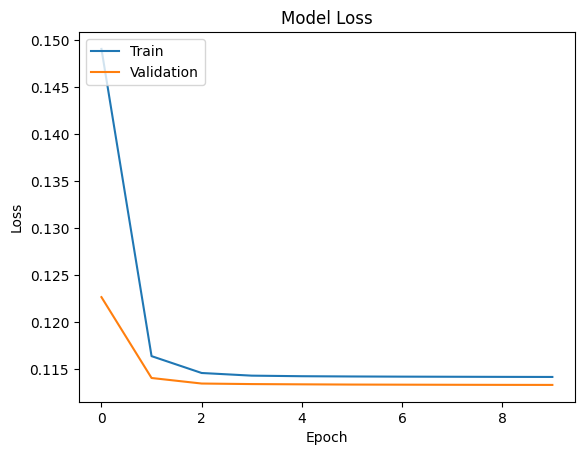

In [228]:
# Plot training & validation loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [230]:
predictions.shape

(200, 1)

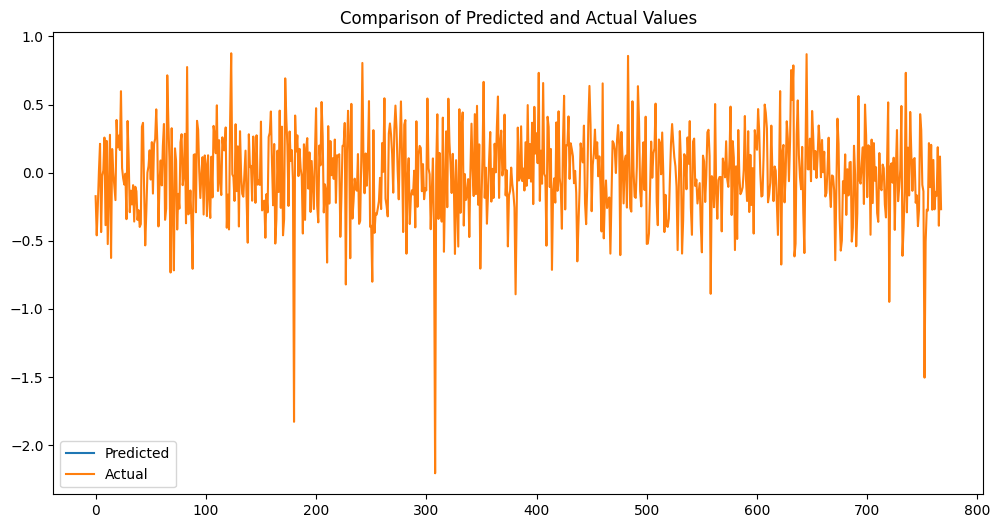

In [235]:
import matplotlib.pyplot as plt

# Example of comparing the first predicted and actual values
predicted_example = predictions[1]
actual_example = y_job_test_array[1]

# Simple comparison plot
plt.figure(figsize=(12, 6))
plt.plot(predicted_example, label='Predicted')
plt.plot(actual_example, label='Actual')
plt.title('Comparison of Predicted and Actual Values')
plt.legend()
plt.show()


In [ ]:
job_embeddings = {}
for job in df_jobs['job_title'].unique():
    embedding = get_embedding(job)  # Using the same function as in your model
    job_embeddings[tuple(embedding)] = job 

In [241]:
unique_job_titles=set()
for key,value in sorted_full_job_progression_dict_lower.items():
    unique_job_titles.add(key)
    for each in value:
        unique_job_titles.add(each)
unique_job_titles

job_embeddings = {}
for job in unique_job_titles:
    embedding = get_embedding(job)  # Using the same function as in your model
    job_embeddings[tuple(embedding)] = job  # Storing embedding as tuple for dictionary key


Accuracy: 16.00%


-0.4108475

In [248]:
for ref_embedding, job_title in job_embeddings.items():
    print(job_title)

junior ai developer
business intelligence manager
junior data analyst
data engineering manager
quantitative research manager
chief technology officer
quantitative analyst
vice president of product
director of database management
junior database administrator
senior statistician
junior data engineer
senior quantitative analyst
director of analytics
data scientist
senior business analyst
junior data scientist
ai architect
ai developer
principal data scientist
research scientist
director of product management
database administrator
principal scientist
big data architect
senior data architect
data engineer
ai project manager
chief information officer
lead data scientist
data analyst
senior data product manager
business analyst
statistician
research assistant
senior machine learning engineer
business intelligence analyst
chief science officer
head of machine learning
data product manager
head of big data
senior business intelligence analyst
head of ai
enterprise architect
senior big data en

In [233]:
actual_example

array([-3.58671546e-01, -2.29521826e-01, -1.42514808e-02,  2.66777486e-01,
        1.15866764e-02, -1.25419453e-01, -1.04504168e-01,  2.41271913e-01,
       -1.51614547e-01, -6.48525283e-02, -1.18295379e-01, -2.19471335e-01,
        1.31163970e-02,  3.70578580e-02, -3.00845355e-01, -4.83678967e-01,
        8.88684317e-02, -6.07893318e-02,  2.58782566e-01, -4.16541621e-02,
       -9.02542099e-02, -2.17963099e-01, -1.84821770e-01,  5.66751003e-01,
        8.03382471e-02,  1.81487039e-01, -3.88681561e-01,  6.56466037e-02,
       -3.18080902e-01,  1.48544358e-02,  9.48157385e-02,  5.84443770e-02,
       -3.18052441e-01,  3.01034331e-01,  7.90303499e-02, -3.29740584e-01,
       -5.01205539e-03,  6.99420124e-02, -5.98850071e-01,  3.88763398e-01,
       -3.51092666e-01, -2.47786686e-01, -3.63929234e-02,  1.19878471e-01,
       -6.85997486e-01, -4.56651449e-01, -1.68723091e-01,  4.62028772e-01,
       -2.18689203e-01,  1.38805389e-01, -2.51574606e-01,  1.96390226e-01,
       -2.47514844e-01, -

In [188]:
X_train[0].shape

(1, 6)

In [151]:
X_train


(800, 6)

In [144]:
# Assuming X_train and X_test are Pandas DataFrames
X_train_reshaped = X_train.values.reshape((X_train.shape[0], 1, X_train.shape[1]))
X_test_reshaped = X_test.values.reshape((X_test.shape[0], 1, X_test.shape[1]))


In [156]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM
from transformers import AutoTokenizer, TFAutoModel
# Building the LSTM model

# Convert the data to tensors
X_train_tensor = tf.convert_to_tensor(X_train, dtype=tf.float32)
X_test_tensor = tf.convert_to_tensor(X_test, dtype=tf.float32)
y_job_train_tensor = tf.convert_to_tensor(y_job_train, dtype=tf.float32)
y_job_test_tensor = tf.convert_to_tensor(y_job_test, dtype=tf.float32)

model_job = Sequential()
model_job.add(LSTM(64, input_shape=(X_train_tensor.shape[1], X_train_tensor.shape[2])))
model_job.add(Dense(1))  # Adjust based on the nature of your prediction task
model_job.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
history = model_job.fit(X_train_tensor, y_job_train_tensor, epochs=10, batch_size=32, validation_split=0.2)

# Evaluate the model
loss = model_job.evaluate(X_test_tensor, y_job_test_tensor)
print(f"Test Loss: {loss}")

# Predictions
predictions = model_job.predict(X_test_tensor)

ValueError: setting an array element with a sequence.

In [170]:
X_train_tensor = tf.convert_to_tensor(X_train, dtype=tf.float32)

ValueError: setting an array element with a sequence.

In [173]:
for each in X_train:
    print(each.shape)

(1, 6)
(1, 6)
(1, 6)
(1, 6)
(1, 6)
(1, 6)
(1, 6)
(1, 6)
(1, 6)
(1, 6)
(1, 6)
(1, 6)
(1, 6)
(1, 6)
(1, 6)
(1, 6)
(1, 6)
(1, 6)
(1, 6)
(1, 6)
(1, 6)
(1, 6)
(1, 6)
(1, 6)
(1, 6)
(1, 6)
(1, 6)
(1, 6)
(1, 6)
(1, 6)
(1, 6)
(1, 6)
(1, 6)
(1, 6)
(1, 6)
(1, 6)
(1, 6)
(1, 6)
(1, 6)
(1, 6)
(1, 6)
(1, 6)
(1, 6)
(1, 6)
(1, 6)
(1, 6)
(1, 6)
(1, 6)
(1, 6)
(1, 6)
(1, 6)
(1, 6)
(1, 6)
(1, 6)
(1, 6)
(1, 6)
(1, 6)
(1, 6)
(1, 6)
(1, 6)
(1, 6)
(1, 6)
(1, 6)
(1, 6)
(1, 6)
(1, 6)
(1, 6)
(1, 6)
(1, 6)
(1, 6)
(1, 6)
(1, 6)
(1, 6)
(1, 6)
(1, 6)
(1, 6)
(1, 6)
(1, 6)
(1, 6)
(1, 6)
(1, 6)
(1, 6)
(1, 6)
(1, 6)
(1, 6)
(1, 6)
(1, 6)
(1, 6)
(1, 6)
(1, 6)
(1, 6)
(1, 6)
(1, 6)
(1, 6)
(1, 6)
(1, 6)
(1, 6)
(1, 6)
(1, 6)
(1, 6)
(1, 6)
(1, 6)
(1, 6)
(1, 6)
(1, 6)
(1, 6)
(1, 6)
(1, 6)
(1, 6)
(1, 6)
(1, 6)
(1, 6)
(1, 6)
(1, 6)
(1, 6)
(1, 6)
(1, 6)
(1, 6)
(1, 6)
(1, 6)
(1, 6)
(1, 6)
(1, 6)
(1, 6)
(1, 6)
(1, 6)
(1, 6)
(1, 6)
(1, 6)
(1, 6)
(1, 6)
(1, 6)
(1, 6)
(1, 6)
(1, 6)
(1, 6)
(1, 6)
(1, 6)
(1, 6)
(1, 6)
(1, 6)
(1, 6)
(1, 6)

In [182]:
X_train[0][0][0].shape

(768,)

In [167]:
import numpy as np 
embedding_length = 768  # Example length; adjust as needed
X_train_padded = np.array([np.pad(x, (0, max(0, embedding_length - len(x)))) for x in X_train])
X_test_padded = np.array([np.pad(x, (0, max(0, embedding_length - len(x)))) for x in X_test])

# Now convert to TensorFlow tensors
X_train_tensor = tf.convert_to_tensor(X_train_padded, dtype=tf.float32)
X_test_tensor = tf.convert_to_tensor(X_test_padded, dtype=tf.float32)
y_job_train_tensor = tf.convert_to_tensor(y_job_train.values, dtype=tf.float32)  # Ensure this is a flat array
y_job_test_tensor = tf.convert_to_tensor(y_job_test.values, dtype=tf.float32)

ValueError: setting an array element with a sequence.

In [169]:
X_train.shape

(800, 1, 6)

In [153]:
X_train.shape[1]

6

In [78]:
df

,Current Job,Next Job,Current Skills,Next Skills,Skill Gap,course title,Course Taken,Course Skills,random next job
0,statistician,quantitative analyst,"statistical , prompt , c , algorithm , statist...","datum analysis , quantitative analysis , quant...","datum analysis , quantitative analysis , quant...",r datum analysis statistic datum science,datum analysis,"r programming language , datum analysis , stat...",0
1,datum scientist,senior datum scientist,"analytic , datum analysis , statistical , mach...","datum analysis , pytorch , datum processing , ...","pytorch , computer vision , python , docker , ...",no course,docker,,0
2,datum science manager,director of datum science,"analytic , databrick , datum science , nlp , p...","analytic , datum presentation , datum science ...","artificial intelligence , datum mining , quant...",data mining,data mining,"digital datum , datum mining , datum conversio...",0
3,unmatched,unmatched,"generative ai , datum conversion , project man...",apply science,apply science,datum science complete beginner,data science,"c , python , datum science",1
4,unmatched,statistician,,"data science , machine learning , python , mat...","machine learning , python , datum science , po...",machine learn training neural network matlab,machine learning,artificial intelligence,1
...,...,...,...,...,...,...,...,...,...
995,director of database management,chief information officer,,"technology solution , project management , dat...","technology solution , project management , dat...",complete data science project management course,data mining,"data mining , project management , python , da...",0
996,unmatched,chief information officer,"business development , generative ai , market ...","problem solving , computer science","problem solving , computer science",data science machine learn analytic code,data science,"data science , alteryx , azure machine learnin...",1
997,director of business intelligence,unmatched,"visualization , analytic , data drive decision...",datum analysis,datum analysis,datum analyst python beginner,undefined,"datum analysis , python , python programming l...",1
998,unmatched,unmatched,"computer science , analytic , risk analytic","statistical , nlp , machine learning , python ...","statistical , nlp , machine learning , python ...",beginner introduction natural language processing,natural language processing,"algorithmic trading , analytic , statistical ,...",1


In [81]:
df[col].apply(preprocess_text)

TypeError: 'int' object is not callable

In [76]:
df

,Current Job,Next Job,Current Skills,Next Skills,Skill Gap,course title,Course Taken,Course Skills,random next job
0,statistician,quantitative analyst,statistical prompt c algorithm statistical ana...,datum analysis quantitative analysis quantitat...,datum analysis quantitative analysis quantitat...,r datum analysis statistic datum science,datum analysis,r programming language datum analysis statisti...,0
1,datum scientist,senior datum scientist,analytic datum analysis statistical machine le...,datum analysis pytorch datum processing comput...,pytorch computer vision python docker datum vi...,course,docker,,0
2,datum science manager,director datum science,analytic databrick datum science nlp problem s...,analytic datum presentation datum science datu...,artificial intelligence datum mining quantitat...,data mining,data mining,digital datum datum mining datum conversion co...,0
3,unmatched,unmatched,generative ai datum conversion project managem...,apply science,apply science,datum science complete beginner,data science,c python datum science,1
4,unmatched,statistician,,data science machine learning python matlab po...,machine learning python datum science postgres...,machine learn training neural network matlab,machine learning,artificial intelligence,1
...,...,...,...,...,...,...,...,...,...
995,director database management,chief information officer,,technology solution project management datum s...,technology solution project management datum s...,complete data science project management course,data mining,data mining project management python datum sc...,0
996,unmatched,chief information officer,business development generative ai market anal...,problem solving computer science,problem solving computer science,data science machine learn analytic code,data science,data science alteryx azure machine learning le...,1
997,director business intelligence,unmatched,visualization analytic data drive decision mak...,datum analysis,datum analysis,datum analyst python beginner,undefined,datum analysis python python programming langu...,1
998,unmatched,unmatched,computer science analytic risk analytic,statistical nlp machine learning python matlab...,statistical nlp machine learning python matlab...,beginner introduction natural language processing,natural language processing,algorithmic trading analytic statistical artif...,1


In [66]:
isinstance(df["Course Skills"],set)

False

In [67]:
df

,Current Job,Next Job,Current Skills,Next Skills,Skill Gap,course title,Course Taken,Course Skills,random next job
0,statistician,quantitative analyst,"statistical, prompts, c, algorithms, statistic...","data analysis, quantitative analysis, quantita...","data analysis, quantitative analysis, quantita...",r data analysis statistics data science,data analysis,"r programming language, data analysis, statist...",0
1,data scientist,senior data scientist,"analytics, data analysis, statistical, machine...","data analysis, pytorch, data processing, compu...","pytorch, computer vision, python, docker, data...",NaN,docker,,0
2,data science manager,director of data science,"analytics, databricks, data science, nlp, prob...","analytics, data presentation, data science, da...","artificial intelligence, data mining, quantita...",data mining,data mining,"digital data, data mining, data conversion, co...",0
3,unmatched,unmatched,"generative ai, data conversion, project manage...",applied science,applied science,data science complete beginners,data science,"c, python, data science",1
4,unmatched,statistician,,"data science, machine learning, python, matlab...","machine learning, python, data science, postgr...",machine learning training neural network matlab,machine learning,artificial intelligence,1
...,...,...,...,...,...,...,...,...,...
995,director of database management,chief information officer,,"technology solutions, project management, data...","technology solutions, project management, data...",complete data science project management course,data mining,"data mining, project management, python, data ...",0
996,unmatched,chief information officer,"business development, generative ai, market an...","problem solving, computer science","problem solving, computer science",data science machine learning analytics coding,data science,"data science, alteryx, azure machine learning,...",1
997,director of business intelligence,unmatched,"visualization, analytics, data driven decision...",data analysis,data analysis,data analyst python beginners,undefined,"data analysis, python, python programming lang...",1
998,unmatched,unmatched,"computer science, analytics, risk analytics","statistical, nlp, machine learning, python, ma...","statistical, nlp, machine learning, python, ma...",beginner introduction natural language processing,natural language processing,"algorithmic trading, analytics, statistical, a...",1


In [657]:
df_c_cleaned_2["full_description"]

0       machine learning z ai python r chatgpt bonus p...
1       python data science machine learning bootcamp ...
2       data science course complete data science boot...
3       r programming z r data science real exercises ...
4       deep learning z neural networks ai chatgpt bon...
                              ...                        
3348    tensorflow p br p p p p br p p p p br p p p p ...
3349    cr er un modern data pipeline en moins de h p ...
3350    introduzione intelligenza artificiale e casi u...
3351    databricks certified data engineer associate e...
3352    natural language processing nlp python nltk p ...
Name: full_description, Length: 3353, dtype: object

array([0.07113545, 0.13744454, 0.1373591 , ..., 0.01678999, 0.05373866,
       0.02915278])

In [15]:
df_c_cleaned["cosine_score"]=cosine_similarities

In [16]:
df_c_cleaned.sort_values(by='cosinr_score', ascending=False)

,Unnamed: 0,title,url,description,headline,num_subscribers,rating,num_reviews,num_quizzes,num_lectures,num_curriculum_items,requirements_data,what_you_will_learn_data,target_audiences,estimated_content_length,content_info,instructional_level,objectives,full_description,skills_tagged,price,course_title,course_url,course_display_name,course_score,cosinr_score
323,323,getting started data management,https://www.udemy.com/course/getting-started-w...,p data management important competencies compa...,learn basics organizations deal data analyze d...,2414,4.499361,491,0,61,61,know install software computer good,started working data,seeking career data management,136,2.5 total hours,Beginner Level,started working data,getting started data management p data managem...,"{'data integration', 'big data', 'python progr...",44.99,database management,https://www.udemy.com/topic/database-management/,database management,1.00,0.399582
1542,1542,cdmp metadata specialist exam questions practi...,https://www.udemy.com/course/cdmp-metadata/,p looking data management skills level stand r...,comprehensive practice exam metadata managemen...,2773,4.599366,8,4,0,4,education strong foundation computer science i...,understand importance metadata data management...,professionals aspire metadata management speci...,0,100 questions,All Levels,understand importance metadata data management...,cdmp metadata specialist exam questions practi...,"{'data integration', 'data architecture', 'big...",29.99,undefined,UnDefined,undefined,1.00,0.290362
968,968,data science machine learning analytics coding,https://www.udemy.com/course/data-science-mach...,p want super charge career learning demand ski...,solve real data science problems add value qui...,316,4.622213,44,0,45,45,computer space install knime analytics platform,fundamentals data science problem solving,beginners data science know code,191,3 total hours,Beginner Level,fundamentals data science problem solving,data science machine learning analytics coding...,"{'data science', 'azure machine learning', 'pr...",49.99,data science,https://www.udemy.com/topic/data-science/,data science,1.00,0.271392
137,137,data science complete data science machine lea...,https://www.udemy.com/course/complete-data-sci...,p data science machine learning hottest skills...,learn master data science python machine learn...,19379,4.565251,2886,6,281,287,prerequisites teach right basics python advanc...,learn complete data science skillset required ...,beginners advance programmers want career data...,1549,26 total hours,All Levels,learn complete data science skillset required ...,data science complete data science machine lea...,"{'data architecture', 'python programming lang...",99.99,data science,https://www.udemy.com/topic/data-science/,data science,1.00,0.267680
1885,1885,data science bootcamp computer programming lan...,https://www.udemy.com/course/complete_python_p...,p hello thrilled help unleash potentials help ...,course bridge gap computer science statistics ...,3,0.000000,0,0,47,47,requirement course eagerness willingness learn...,students able understand basic concept data sc...,best course aspiring statistician,405,7 total hours,Expert Level,students able understand basic concept data sc...,data science bootcamp computer programming lan...,"{'computer science', 'data science', 'problem ...",19.99,data science,https://www.udemy.com/topic/data-science/,data science,1.00,0.261674
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2734,2734,pandas,https://www.udemy.com/course/pandas_basics/,p python pandas p p pandas p p br p p pandas p...,NaN,335,4.185726,39,0,30,30,python,NaN,NaN,208,3.5 total hours,Beginner Level,NaN,pandas p python pandas p p pandas p p br p p p...,{'python'},19.99,data analysis,https://www.udemy.com/topic/data-analysis/,data analysis,0.00,0.000000
2735,2735,sql,https://www.udemy.com/course/cloom-sql-oracle/,p strong strong p p br p p p p ai p p 

In [674]:
def preprocess_text(text):
    return " ".join(token.lemma_.lower() for token in nlp(text) if not token.is_punct and not token.is_stop)
preprocess_text(df_c_cleaned[df_c_cleaned["title"]=="machine learning data science bootcamp r python"]["full_description"].values[0])

'p academy computing amp artificial intelligence proudly present course em datum engineer python em start expert team strong academy computing amp artificial intelligence strong phd phd candidate senior lecturer consultant researcher industry expert hire manager discussion highly pay job amp skill computer science engineering datum science sector p p end course able start career datum mining amp nbsp machine learn p p strong introduction machine learn z comprehensive training step step guidance strong p p strong set environment machine learn step step guidance nbsp r programming amp nbsp python strong p p strong supervised learn strong univariate linear regression multivariate linear regression logistic regression naive baye classifi tree support vector machine svm random forest strong strong p p strong unsupervised learn strong p p strong convolutional neural network cnn strong p p strong artificial neural network strong p p strong real world project source strong p p br p p br p p st

In [ ]:
df_j

In [648]:
sorted_full_job_progression_dict_lower["enterprise architect"]

['product analyst',
 'data product manager',
 'senior data product manager',
 'director of product management',
 'vice president of product',
 'chief product officer',
 'big data engineer',
 'senior big data engineer',
 'big data architect',
 'head of big data',
 'director of data engineering',
 'chief information officer']

In [ ]:
select_next_job("director of data science",df_j_cleaned_2,sorted_full_job_progression_dict_lower)

In [570]:


select_random_job(df_j_cleaned_2)

('chief strategy officer',
 {'business development',
  'data analysis',
  'data collection',
  'project management',
  'visualization'})

('business analyst', {'analytics', 'data analysis'})

In [628]:
sorted_full_job_progression_dict_lower["director of data science"]

['vice president of data science', 'chief data scientist']

In [616]:
def select_relevant_course(df_c_cleaned, skill_gap):
    # Apply the scoring function to each course
    df_c_cleaned['course_score'] = df_c_cleaned.apply(calculate_course_score, axis=1, skill_gap=skill_gap)

    # Sort courses based on the calculated score
    df_c_cleaned = df_c_cleaned.sort_values(by='course_score', ascending=False)

    # Select the top course if available
    top_course = df_c_cleaned.iloc[0] if not df_c_cleaned.empty else None
    return top_course
select_relevant_course(df_c_cleaned,{'algorithms',
  'artificial intelligence',
  'computer science',
  'data science',
  'data visualization',
  'machine learning',
  'visualization'})

title                                data science interview questions answers
url                         https://www.udemy.com/course/data-science-inte...
description                 p warm welcome strong data science interview q...
headline                    prepare data scientist machine learning engine...
num_subscribers                                                         16005
rating                                                               2.023462
num_reviews                                                                51
num_quizzes                                                                 0
num_lectures                                                                5
num_curriculum_items                                                        5
requirements_data                         enthusiasm determination mark world
what_you_will_learn_data    familiarized popular data science interview qu...
target_audiences            candidates preparing data scientist 

{'ai architect',
 'ai developer',
 'ai project manager',
 'business analysis manager',
 'business analyst',
 'business intelligence analyst',
 'business intelligence manager',
 'chief information officer',
 'chief product officer',
 'chief strategy officer',
 'chief technology officer',
 'data analyst',
 'data architect',
 'data engineer',
 'data engineering manager',
 'data manager',
 'data product manager',
 'data science manager',
 'data scientist',
 'database administrator',
 'database manager',
 'director of analytics',
 'director of business intelligence',
 'director of data engineering',
 'director of data science',
 'director of product management',
 'director of research',
 'enterprise architect',
 'head of big data',
 'machine learning architect',
 'machine learning engineer',
 'machine learning manager',
 'principal data scientist',
 'principal scientist',
 'product analyst',
 'quantitative analyst',
 'quantitative research manager',
 'research analyst',
 'research scientist

In [589]:
df_j_cleaned_2["title_cleaned"].unique()

array(['senior data architect', 'senior ai developer', 'data architect',
       'senior machine learning engineer', 'machine learning engineer',
       'ai project manager', 'senior research scientist',
       'research scientist', 'business intelligence manager',
       'business analyst', 'senior data product manager',
       'product analyst', 'data analyst', 'database administrator',
       'data scientist', 'senior data engineer', 'senior data analyst',
       'chief product officer', 'chief technology officer',
       'chief strategy officer', 'director of product management',
       'senior of product', 'research analyst', 'quantitative analyst',
       'data engineer', 'machine learning architect', 'ai architect',
       'quantitative research manager', 'senior business analyst',
       'senior database administrator', 'chief information officer',
       'director of data science', 'head of big data',
       'director of analytics', 'data manager', 'principal scientist',
      

In [581]:
sorted_full_job_progression_dict_lower["data analyst"]

['data engineer',
 'senior data engineer',
 'lead data engineer',
 'data architect',
 'senior data architect',
 'enterprise architect',
 'product analyst',
 'data product manager',
 'senior data product manager',
 'director of product management',
 'vice president of product',
 'chief product officer',
 'big data engineer',
 'senior big data engineer',
 'big data architect',
 'head of big data',
 'director of data engineering',
 'chief information officer',
 'machine learning engineer']

In [551]:
df_j_cleaned_2 = df_j_cleaned[df_j_cleaned["title_cleaned"]!="unmatched"]
df_j_cleaned_2

,company,truncatedCompany,companyRating,companyReviewCount,searched_title,title,title_cleaned,normTitle,min,max,type,snippet,jobDescription,skills_tagged
10,SBLI,SBLI,4.3,4.0,Data Architect,senior data warehouse architect,senior data architect,Data Warehouse Architect,145000.00,-1.00,yearly,Develop robust data models for effective data ...,sbli life insurance looking strong senior data...,"{data integration, data visualization, c, pl s..."
13,APTEXX INC,APTEXX INC,NaN,NaN,Data Architect,lead java developer,senior ai developer,Java Developer,NaN,NaN,NaN,Collaborate with team in defining architecture...,inhabit inhabit software company serving resid...,"{mysql, devops, database design, java, aws bat..."
14,Creative Financial Staffing,Creative Financial Staffing,4.0,220.0,Data Architect,data architect developer,data architect,Data Warehouse Architect,110000.00,120000.00,yearly,Participate and occasionally lead custom datab...,job description data architect developer compa...,"{data integration, data architecture, computer..."
16,Nasscomm,Nasscomm,NaN,NaN,Data Architect,data architect,data architect,Data Warehouse Architect,55.00,-1.00,hourly,Knowledgeable in multiple data management disc...,experience defining future state data architec...,"{data integration, nosql, data warehousing, bu..."
17,"Lantana Consulting Group, Inc.","Lantana Consulting Group, Inc.",3.7,9.0,Data Architect,data architect,data architect,Data Warehouse Architect,125000.00,160000.00,yearly,"Technical expertise with data models, data min...",description company lantana consulting group p...,"{computer science, data science, data mapping,..."
20,Analog Devices,Analog Devices,3.9,872.0,Senior Machine Learning Engineer,senior engineer machine learning,senior machine learning engineer,Machine Learning Engineer,NaN,NaN,NaN,For positions requiring access to technical da...,come join analog devices adi place innovation ...,{c}
21,Booz Allen Hamilton,Booz Allen Hamilton,3.9,2524.0,Senior Machine Learning Engineer,machine learning software engineer senior,senior machine learning engineer,Machine Learning Engineer,93300.00,212000.00,yearly,"3+ years of experience within data science, ma...",job description location washington dc remote ...,"{data science, c, nosql, data warehousing, dat..."
22,Salesforce,Salesforce,4.3,1106.0,Senior Machine Learning Engineer,senior software engineer machine learning,senior machine learning engineer,Senior Software Engineer,156800.00,215600.00,yearly,You’ll be working closely with other software ...,best candidate experience consider applying ma...,"{data structures, computer science, algorithm ..."
24,Cresta,Cresta,4.2,5.0,Senior Machine Learning Engineer,senior machine learning engineer chat agent,senior machine learning engineer,Machine Learning Engineer,160000.00,230000.00,yearly,Help shape the direction of machine learning a...,interested defining generative ai shape future...,"{conversational ai, data structures, computer ..."
25,Analog Devices,Analog Devices,3.9,872.0,Senior Machine Learning Engineer,senior engineer machine learning scientist,senior machine learning engineer,Machine Learning Engineer,NaN,NaN,NaN,"Create novel machine learning models, training...",come join analog devices adi place innovation ...,"{c, computer vision, algorithms, machine learn..."


In [ ]:
generate_synthetic_data(df_j_cleaned, df_c_cleaned, skills_df, num_samples=1000)

In [215]:
df_j_cleaned[df_j_cleaned["title"]=="data engineer"]["skills_tagged"].values[0]

{'analytics',
 'c',
 'data engineering',
 'data infrastructure',
 'data manipulation',
 'data modeling',
 'data visualization',
 'predictive modeling',
 'problem solving',
 'python',
 'sql',
 'statistical analysis'}

In [544]:
current_job, current_skills = "Data Engineer", df_j_cleaned[df_j_cleaned["title"]=="data engineer"]["skills_tagged"].values[0]
# Select a job to progress to that requires at least one additional skill
next_job, next_skills = "Senior Data Engineer", df_j_cleaned[df_j_cleaned["title"]=="senior data engineer"]["skills_tagged"].values[5]
'''
while set(next_skills).issubset(current_skills):
    next_job, next_skills = select_random_job(jobs_df)
'''
# Find the skill gap
skill_gap = list(set(next_skills) - set(current_skills))
skill_gap

['code review',
 'algorithms',
 'nosql',
 'project management',
 'data infrastructure',
 'unit testing',
 'business analysis',
 'ci cd']

,title,url,description,headline,num_subscribers,rating,num_reviews,num_quizzes,num_lectures,num_curriculum_items,requirements_data,what_you_will_learn_data,target_audiences,estimated_content_length,content_info,instructional_level,objectives,full_description,skills_tagged,price,course_title,course_url,course_display_name,overlap,coverage,course_score
1772,ai machine learning leaders business people,https://www.udemy.com/course/fundamentals-of-m...,p strong introduction strong p p machine learn...,including generative ai machine learning busin...,1014,5.000000,1,3,42,45,prior knowledge machine learning cloud coding ...,developers want start machine learning journey,want learn machine learning ai great detail wa...,134,2 total hours,All Levels,developers want start machine learning journey,p strong introduction strong p p machine learn...,"{c, business architecture, algorithms, feature...",49.99,undefined,UnDefined,undefined,0,0.000,0.25
812,python projects python data science python pro...,https://www.udemy.com/course/python-projects-p...,p hello dear friends p p welcome strong python...,python marathon data science numpy pandas matp...,283,4.733558,55,3,87,90,need desktop computer windows mac capable runn...,new python data science idea data scientist pr...,programming experience wants enter python worl...,762,12.5 total hours,All Levels,new python data science idea data scientist pr...,p hello dear friends p p welcome strong python...,"{statistical programming, nosql, r programming...",69.99,data science,https://www.udemy.com/topic/data-science/,data science,3,0.375,0.25
1167,azure databricks build data engineering ai ml ...,https://www.udemy.com/course/azure-databricks-...,p course designed help develop skill necessary...,learn anomaly detection azure datafactory azur...,121,2.596226,21,0,49,49,basic knowledge python programming language,anomaly detection,data engineers data architect etl developer da...,224,3.5 total hours,Intermediate Level,anomaly detection,p course designed help develop skill necessary...,"{sql, dataset, artificial intelligence, data s...",44.99,databricks,https://www.udemy.com/topic/databricks/,databricks,2,0.250,0.25
212,intro big data data science artificial intelli...,https://www.udemy.com/course/introduction-to-b...,p strong course designed new big data projects...,big data technology tools non technical leader...,1508,4.486865,753,10,80,98,curiosity business technology,examples big data data science practice health...,non technical leaders managers,208,3.5 total hours,Beginner Level,examples big data data science practice health...,p strong course designed new big data projects...,"{data science, algorithms, big data, nosql, ma...",34.99,artificial intelligence,https://www.udemy.com/topic/artificial-intelli...,artificial intelligence,0,0.000,0.25
584,data science r python r programming,https://www.udemy.com/course/full-stack-data-s...,p welcome strong data science r python r progr...,python r programming learn data science r pyth...,698,4.498651,123,10,167,177,prior python r knowledge required,r programming r python course decide,interested data sciences,1408,23.5 total hours,All Levels,r programming r python course decide,p welcome strong data science r python r progr...,"{statistical programming, r programming, nosql...",74.99,data science,https://www.udemy.com/topic/data-science/,data science,3,0.375,0.25


In [547]:
relevant_course[relevant_course["overlap"]!=0][["title","full_description","target_audiences","skills_tagged","overlap","coverage"]]

,title,full_description,target_audiences,skills_tagged,overlap,coverage
812,python projects python data science python pro...,p hello dear friends p p welcome strong python...,programming experience wants enter python worl...,"{statistical programming, nosql, r programming...",3,0.375
1167,azure databricks build data engineering ai ml ...,p course designed help develop skill necessary...,data engineers data architect etl developer da...,"{sql, dataset, artificial intelligence, data s...",2,0.250
584,data science r python r programming,p welcome strong data science r python r progr...,interested data sciences,"{statistical programming, r programming, nosql...",3,0.375
518,stack data science python numpy r programming,p hello dear p p welcome strong stack data sci...,interested data sciences,"{statistical programming, r programming, nosql...",4,0.500
711,machine learning deep learning z hands python,p hello p p strong machine learning python pyt...,machine learning useful predictive texting sma...,"{nosql, python programming language, visualiza...",2,0.250
...,...,...,...,...,...,...
133,time series analysis forecasting python,p looking complete strong course time series f...,people pursuing career data science,"{multiple linear regression, feature engineeri...",1,0.125
1434,computer science foundation know needed,p welcome course computer science let consider...,degree seeking students bachelor master field ...,"{computer science, c, code editor}",1,0.125
1436,learning path statistics data mining data science,p data science evolving field data science inc...,course developers budding data scientists data...,"{computer science, data science, statistical, ...",1,0.125
1438,mnist example practical convolutional nns,p owner makine renmesi machine learning strong...,deep learning enthusiasts trouble going step m...,"{deep learning, convolutional neural networks,...",1,0.125


In [ ]:
import spacy
import pandas as pd
from scipy.cluster.hierarchy import dendrogram, linkage
from matplotlib import pyplot as plt

# Load SpaCy model for vectorization
nlp = spacy.load("en_core_web_md")

# Vectorize skills
#skill_vectors = [nlp(skill).vector for skill in skills_list]

# Perform hierarchical clustering
#Z = linkage(skill_vectors, method='ward')

import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from scipy.cluster.hierarchy import linkage, dendrogram
import matplotlib.pyplot as plt

# Text vectorization
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(skills_list)

# Hierarchical clustering
Z = linkage(X.toarray(), 'ward')

# Plot dendrogram
plt.figure(figsize=(10, 7))
dendrogram(Z, labels=skills_list, leaf_rotation=90)
plt.title("Skills Hierarchical Clustering")
plt.show()

# From the dendrogram, decide the number of clusters or the level at which to cut the tree
# Then assign cluster names based on common themes in each cluster

from scipy.cluster.hierarchy import fcluster

# Determine the number of clusters, for example, by setting a threshold
distance_threshold = 1.5
clusters = fcluster(Z, distance_threshold, criterion='distance')
clusters
# Or determine by specifying the exact number of clusters desired
#k = 10
#clusters = fcluster(Z, k, criterion='maxclust')

from collections import Counter

# Assuming you have the following:
# clusters: an array with the cluster labels for each job title
# job_titles: an array with the corresponding job titles

# Create a dictionary where each key is a cluster and the value is a list of titles
clustered_titles = {i: [] for i in range(1, len(set(clusters))+1)}
for title, cluster_label in zip(skills_list, clusters):
    clustered_titles[cluster_label].append(title)

# For each cluster, find the most common words
cluster_names = {}
for cluster, titles in clustered_titles.items():
    # Flatten the list of titles into a list of words
    words = " ".join(titles).lower().split()
    # Count the frequency of each word
    word_counts = Counter(words)
    # Remove common stop words (optional, depends on your data)
    for stop_word in [ 'and', 'the', '-']:
        if stop_word in word_counts:
            del word_counts[stop_word]
    # Take the top 3 most common words as the name
    cluster_names[cluster] = ' '.join([word for word, _ in word_counts.most_common(3)])
clustered_titles
# Now cluster_names contains a 'name' for each cluster based on the most common words
########################
xs = set()
for i,each in enumerate(df_c_cleaned_2["skills_tagged"]):
    if len(each)==0:
        print(i)
        print(df_c_cleaned_2[i:i+1]["title"].unique())
        print(df_c_cleaned_2[i:i+1]["description"].unique())
        print("/n")
    for each_v in each:
        xs.add(each_v)

In [ ]:
# train a spacy model to identify skills 
# create entities 
import spacy
from spacy.matcher import PhraseMatcher
from spacy.tokens import Span
from spacy.util import filter_spans

nlp = spacy.load("en_core_web_sm")  # Load the model
matcher = PhraseMatcher(nlp.vocab, attr="LOWER")  # Create the matcher object


# Convert the skills list to Doc objects and add them as patterns to the matcher
patterns = [nlp.make_doc(skill) for skill in skills_list]
matcher.add("Skills", patterns)


def get_entities(TRAIN_DATA):
    for _, annotations in TRAIN_DATA:
        for ent in annotations.get('entities'):
            print(ent)

TRAIN_DATA = []

# Loop through the job descriptions and create training data
for job_description in job_descriptions:
    # Process the job description to create a Spacy Doc
    doc = nlp(job_description)
    # Match the patterns to the doc
    matches = matcher(doc)
    # Create Span objects for the matched sequences
    spans = [Span(doc, start, end, label="SKILLS") for match_id, start, end in matches]
    # Filter the spans to remove overlaps
    #print(spans)
    filtered_spans = filter_spans(spans)
    #print(spans)
    entities = [(span.start_char, span.end_char, span) for span in filtered_spans]
    TRAIN_DATA.append((job_description, {"entities": entities}))

#print(TRAIN_DATA)





# train the model

#train the model 
starting_fresh = False
# Load a pre-existing spaCy model
nlp = spacy.load('en_core_web_sm')  # for example
import random
from spacy.util import minibatch
# Get the Named Entity Recognizer component in the pipeline
ner = nlp.get_pipe('ner')
from spacy.training import Example
from pathlib import Path

# Add new entity labels to 'ner'
for _, annotations in TRAIN_DATA:
    for start,end,label in annotations.get('entities'):
        #print(label)
        ner.add_label(str(label))


# Disable other pipes during training
unaffected_pipes = [pipe for pipe in nlp.pipe_names if pipe != 'ner']


# Begin training
with nlp.disable_pipes(*unaffected_pipes):
    if starting_fresh:
        nlp.begin_training()

    for itn in range(5):
        random.shuffle(TRAIN_DATA)
        losses = {}

        # Batch up the examples using spaCy's minibatch
        for batch in minibatch(TRAIN_DATA, size=2):
            examples = []
            for text, annotations in batch:
                # Create a Spacy Doc from the text
                doc = nlp.make_doc(text)
                # Create an Example using the annotations
                example = Example.from_dict(doc, annotations)
                examples.append(example)

            # Update the model
            nlp.update(
                examples,
                drop=0.5,  # Dropout - make it harder to memorize data
                losses=losses
            )
        print(losses)

'''
from pathlib import Path
output_dir = Path('/Users/nyzy/nitzmali/job_transition_pathway/models/skills_tag_spacy_nlp_model')
nlp.to_disk(output_dir)
print("Saved model to", output_dir)
'''


# Split your TRAIN_DATA into train, validate and test sets
def train_test_val_split(data, test_size=0.2, val_size=0.25, random_state=42):
    # Calculate actual validation set size of the remaining data after test split
    val_size_adjusted = val_size / (1 - test_size)
    # Split off test set from available data
    train_val_data, test_data = train_test_split(data, test_size=test_size, random_state=random_state)
    # Split remaining data into training and validation sets
    train_data, val_data = train_test_split(train_val_data, test_size=val_size_adjusted, random_state=random_state)
    return train_data, val_data, test_data
train_data, val_data, test_data = train_test_val_split(TRAIN_DATA, test_size=0.2, val_size=0.25)


#########################################################################################
# Load the model you want to evaluate
from spacy import displacy
nlp = spacy.load('/Users/nyzy/nitzmali/job_transition_pathway/models/skills_tag_spacy_nlp_model')  # replace with your model name

# Split your TRAIN_DATA into train, validate and test sets
train_data, val_data, test_data = train_test_val_split(TRAIN_DATA, test_size=0.2, val_size=0.25)

# Convert the validation data to spaCy's Example format
examples = []
for input_, annots in val_data:
    pred = nlp(input_)
    example = Example.from_dict(pred, annots)
    examples.append(example)


# Use the Scorer to score the examples
scorer = Scorer(nlp)
scores = scorer.score(examples)


precision = scores['ents_p']
recall = scores['ents_r']
f_score = scores['ents_f']

print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F-score: {f_score}")

examples[0]


# Assume 'nlp' is your loaded NLP model
for text, annots in val_data[3:5]:  # Let's use val_data as an example
    doc = nlp(text)  # Process the text to predict entities

    '''
    print("Predictions by model:")
    for ent in doc.ents:
        print("Predictions")
        #print(ent.text, ent.start_char, ent.end_char, ent.label_)

    # Now print the correct data for comparison
    print("\nCorrect labels:")
    for start, end, label in annots['entities']:
        print("Actual")
        #print(text[start:end], start, end, label)
    '''
    # You can use displacy here as well if you prefer visual comparison
    displacy.render(doc, style="ent", jupyter=True)

    # Adding a separation for readability between different examples
    print("\n" + "-" * 50 + "\n")


